In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib
# matplotlib.use('qt5agg')
import matplotlib.pyplot as plt
import time
import numpy as np
import query_db
import composite
import matplotlib.gridspec as gridspec
import spectral_analysis as sa

# Max-No dm15 Match

In [3]:
%matplotlib inline

In [4]:
# query_host_max = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 14 and 18",
#                   "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 10 and 13",
#                   "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 1 and 9"]
query_host_max = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and NED_host >= 10",
                  "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and NED_host between 1 and 9"]

In [5]:
comps_host_max, sn_arrays_host_max, boot_sn_arrays_host_max = query_db.main(len(query_host_max), query_host_max, boot='b', medmean=1, verbose=False, gini_balance=True)

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and NED_host >= 10
353 Total Spectra found
105 questionable files currently ignored
(11, 'questionable spectra removed', 342, 'spectra left')
(11, 'Peculiar Ias removed', 331, 'spectra left')
275 valid spectra found
Arrays cleaned
7 spectra may have telluric contamination


composite.py:1208: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if template.RMSE != None:
composite.py:1245: RuntimeWarning: divide by zero encountered in divide
  error = 1./np.sqrt(template.ivar)


98 total SNe
94 SNe with host corrections


gini.py:43: RuntimeWarning: invalid value encountered in absolute
  g_diff = np.absolute(g_wi - g_wj)


Gini balancing...
Balanced after 26 iterations
Bootstrapping
scaling boots...


C:\Program Files\Anaconda2\lib\site-packages\scipy\optimize\optimize.py:527: RuntimeWarning: invalid value encountered in absolute
  if (numpy.max(numpy.ravel(numpy.abs(sim[1:] - sim[0]))) <= xatol and


computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and NED_host between 1 and 9
156 Total Spectra found
105 questionable files currently ignored
(11, 'questionable spectra removed', 145, 'spectra left')
(0, 'Peculiar Ias removed', 145, 'spectra left')
128 valid spectra found
Arrays cleaned
8 spectra may have telluric contamination
41 total SNe
41 SNe with host corrections


gini.py:48: RuntimeWarning: invalid value encountered in double_scalars
  gini_coeffs.append(gini_num/gini_denom)


Gini balancing...
Balanced after 15 iterations
Bootstrapping
scaling boots...
computing confidence intervals...


Phase:  0.240216672713
dm15:  1.08438981789
Redshift:  0.0144410928428
Morphology:  13.1490245759
Phase:  0.0420670343422
dm15:  1.37488612923
Redshift:  0.0120043975956
Morphology:  5.20990859317


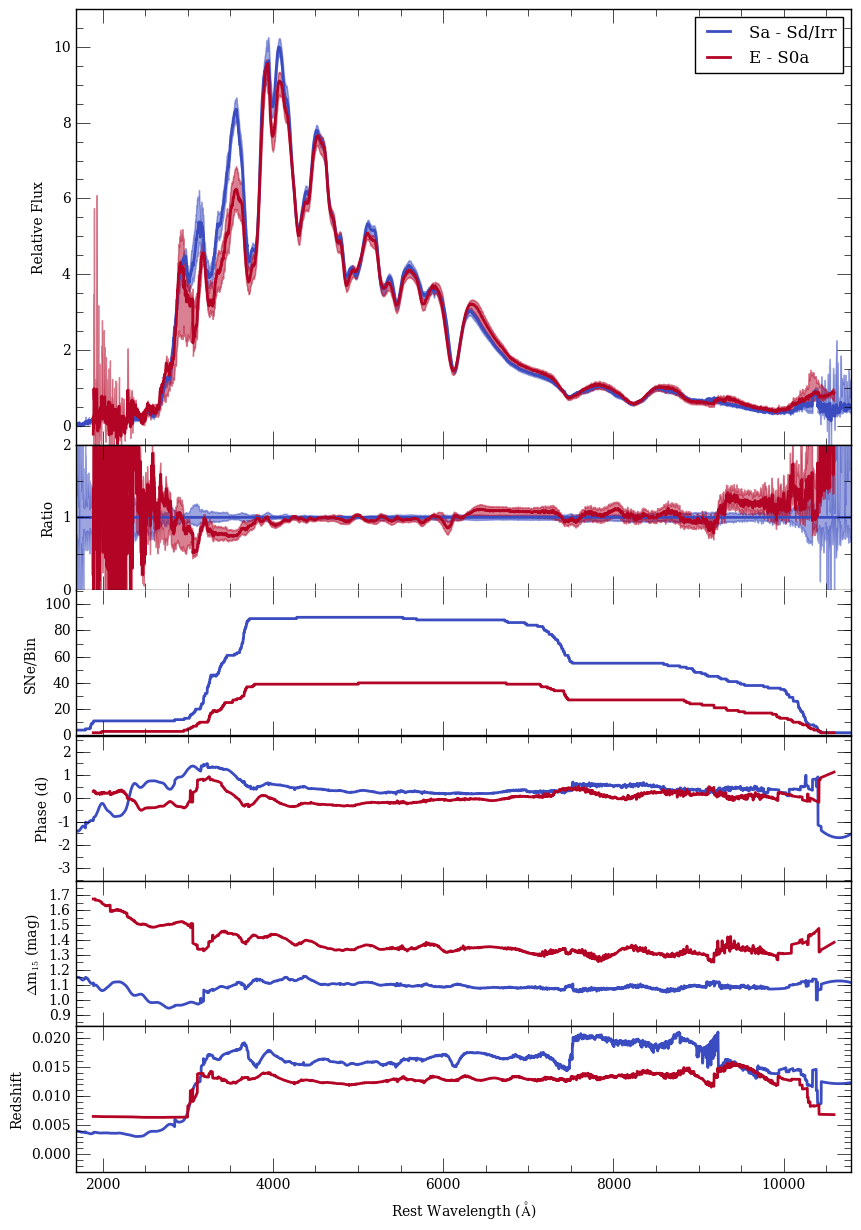

In [6]:
query_db.set_min_num_spec(comps_host_max, 1)
# query_db.comparison_plot(comps_host_max, scale_type=True)
query_db.comparison_plot(comps_host_max, scale_type=False, min_num_show=2, legend_labels = ['Sa - Sd/Irr','E - S0a'], savename='host_composites_updated/all_dm15_host_max')
# query_db.stacked_plot(comps_host_max)

# Max-Mid dm15 Matched

In [48]:
# query_host_low_dm15 = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host >= 10 and ((dm15_source >= 1.2 and dm15_source < 1.5) or (dm15_from_fits >= 1.2 and dm15_from_fits < 1.5)) and Supernovae.SN != '1999ac'",
#                        "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -2 and phase <= 3 and NED_host between 1 and 9 and ((dm15_source >= 1.1 and dm15_source < 1.5) or (dm15_from_fits >= 1.1 and dm15_from_fits < 1.5))"]
query_host_match_p0 = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and NED_host between 10 and 18 and ((dm15_source >= 1.2 and dm15_source < 1.5) or (dm15_from_fits >= 1.2 and dm15_from_fits < 1.5)) and Spectra.SN != '1999ac'",
                       "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -2 and phase <= 3 and NED_host between 1 and 9 and ((dm15_source >= 1.1 and dm15_source < 1.5) or (dm15_from_fits >= 1.1 and dm15_from_fits < 1.5))"]

In [49]:
# comps_host_low_dm15, sn_arrays_low_dm15, boot_sn_arrays_low_dm15 = query_db.main(len(query_host_low_dm15), query_host_low_dm15, boot='b', medmean=1, selection='choose_bluest')
comps_host_match_p0, sn_arrays_match_p0, boot_sn_arrays_match_p0 = query_db.main(len(query_host_match_p0), query_host_match_p0, boot='b', medmean=1, verbose=False, gini_balance=True)

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and NED_host between 10 and 18 and ((dm15_source >= 1.2 and dm15_source < 1.5) or (dm15_from_fits >= 1.2 and dm15_from_fits < 1.5)) and Spectra.SN != '1999ac'
74 Total Spectra found
105 questionable files currently ignored
(4, 'questionable spectra removed', 70, 'spectra left')
(0, 'Peculiar Ias removed', 70, 'spectra left')
57 valid spectra found
Arrays cleaned
5 spectra may have telluric contamination
16 total SNe
15 SNe with host corrections
Gini balancing...
Balanced after 9 iterations
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -2 and phase <= 3 and NED_host between 1 and 9 and ((dm15_source >= 1.1 and dm15_source < 1.5) or (dm15_from_fits >= 1.1 and dm15_from_fits < 1.5))
60 Total Spectra found
105 questionable files currently ignored
(5, 'questionable spectra 

Phase:  0.594104733598
dm15:  1.30331816359
Redshift:  0.0178006684981
Morphology:  11.3607740647
Phase:  0.391503157968
dm15:  1.29173234124
Redshift:  0.0154315060086
Morphology:  6.61992783069


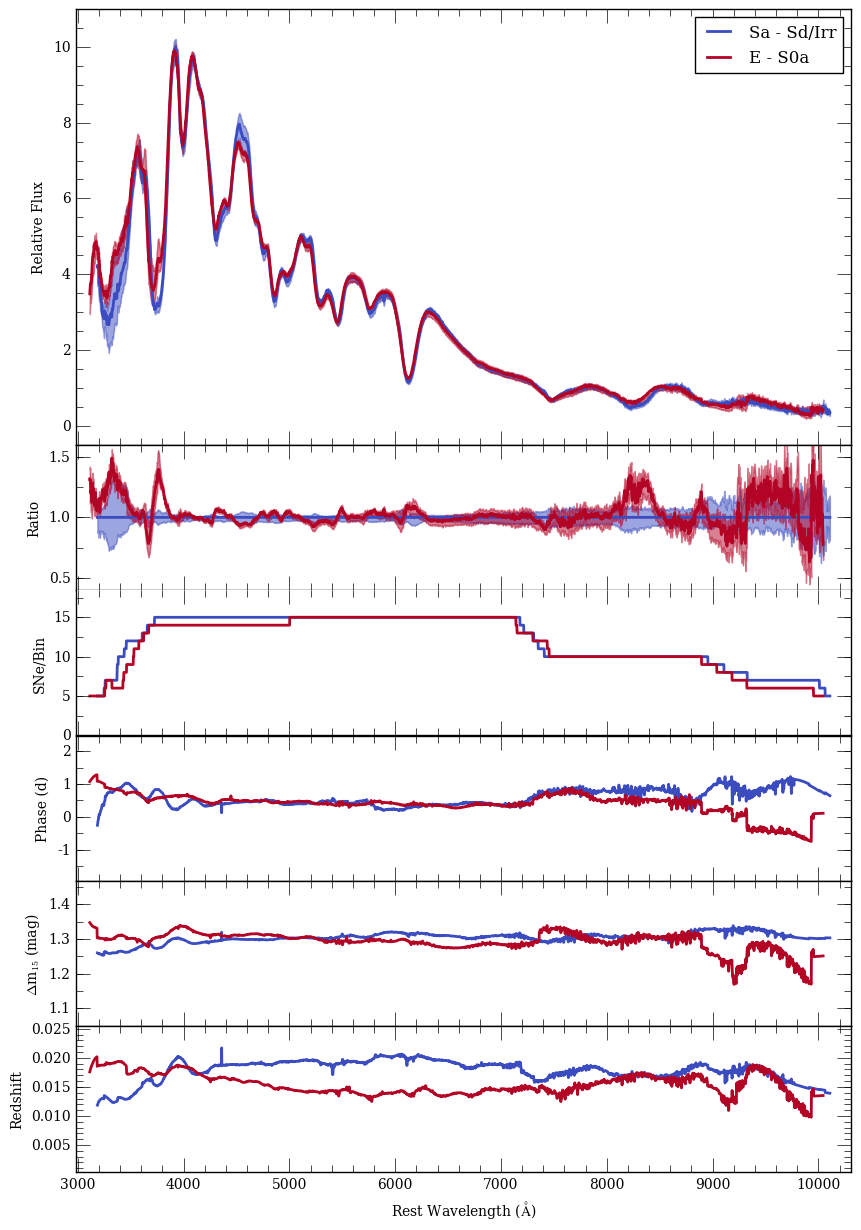

In [50]:
# composite.optimize_scales(comps_host_low_dm15, comps_host_low_dm15[0], True)
query_db.set_min_num_spec(comps_host_match_p0, 1)
# query_db.comparison_plot(comps_host_low_dm15, scale_type= True)
# query_db.comparison_plot(comps_host_low_dm15, scale_type= False, min_num_show=2, legend_labels = ['Sa - Sd/Irr','E - S0a'], savename='host_composites_updated/low_dm15_host_max')
# query_db.comparison_plot(comps_host_low_dm15, scale_type= False, min_num_show=5, legend_labels = ['Sa - Sd/Irr','E - S0a'], zoom_ratio=True, savename='host_composites_updated/host_max_dm13')
query_db.comparison_plot(comps_host_match_p0, scale_type= False, min_num_show=5, legend_labels = ['Sa - Sd/Irr','E - S0a'], zoom_ratio=True)

In [51]:
# diff_p0, err_p0, means_p0, varis_p0, EWs_p0 = sa.measure_comp_diff_EW(boot_sn_arrays_match_p0, w1=7600., w2=8200., w3=9000.)

In [52]:
# diff_p0_hk, err_p0_hk, means_p0_hk, varis_p0_hk, EWs_p0_hk = sa.measure_comp_diff_EW(boot_sn_arrays_match_p0, w1=3400., w2=3700., w3=4000.)

In [53]:
# query_host_mid_dm15_m1week = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -6 and phase <= 0 and NED_host >= 10 and ((dm15_source >= 1.2 and dm15_source < 1.45) or (dm15_from_fits >= 1.2 and dm15_from_fits < 1.45)) and Supernovae.SN != '2007bc'",
#                               "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -6 and phase <= 0 and NED_host between 1 and 9 and ((dm15_source >= 1.1 and dm15_source < 1.5) or (dm15_from_fits >= 1.1 and dm15_from_fits < 1.5)) and Supernovae.SN != '1997bp' and Supernovae.SN != '2008hv' and Supernovae.SN != '2002dj' and Supernovae.SN != '1994d'"]
query_host_match_m3 = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -6 and phase <= 0 and NED_host between 10 and 18 and ((dm15_source >= 1.2 and dm15_source < 1.45) or (dm15_from_fits >= 1.2 and dm15_from_fits < 1.45)) and Spectra.SN != '1999ac'",
                              "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -6 and phase <= 0 and NED_host between 1 and 9 and ((dm15_source >= 1.15 and dm15_source < 1.5) or (dm15_from_fits >= 1.15 and dm15_from_fits < 1.5))"]

In [54]:
comps_host_match_m3, sn_arrays_match_m3, boot_sn_arrays_match_m3 = query_db.main(len(query_host_match_m3), query_host_match_m3, boot='b', medmean=1, verbose=False, gini_balance=True)

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -6 and phase <= 0 and NED_host between 10 and 18 and ((dm15_source >= 1.2 and dm15_source < 1.45) or (dm15_from_fits >= 1.2 and dm15_from_fits < 1.45)) and Spectra.SN != '1999ac'
67 Total Spectra found
105 questionable files currently ignored
(2, 'questionable spectra removed', 65, 'spectra left')
(0, 'Peculiar Ias removed', 65, 'spectra left')
51 valid spectra found
Arrays cleaned
8 spectra may have telluric contamination
13 total SNe
12 SNe with host corrections
Gini balancing...
Balanced after 5 iterations
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -6 and phase <= 0 and NED_host between 1 and 9 and ((dm15_source >= 1.15 and dm15_source < 1.5) or (dm15_from_fits >= 1.15 and dm15_from_fits < 1.5))
ERROR:  sn1992a-19920116.220-iue.flm None
46 Total Spectra found
105 questionable file

Phase:  -2.5092817762
dm15:  1.2784871016
Redshift:  0.0157039242505
Morphology:  11.4032788393
Phase:  -2.84652929174
dm15:  1.28992436075
Redshift:  0.0121923456615
Morphology:  5.70566061239


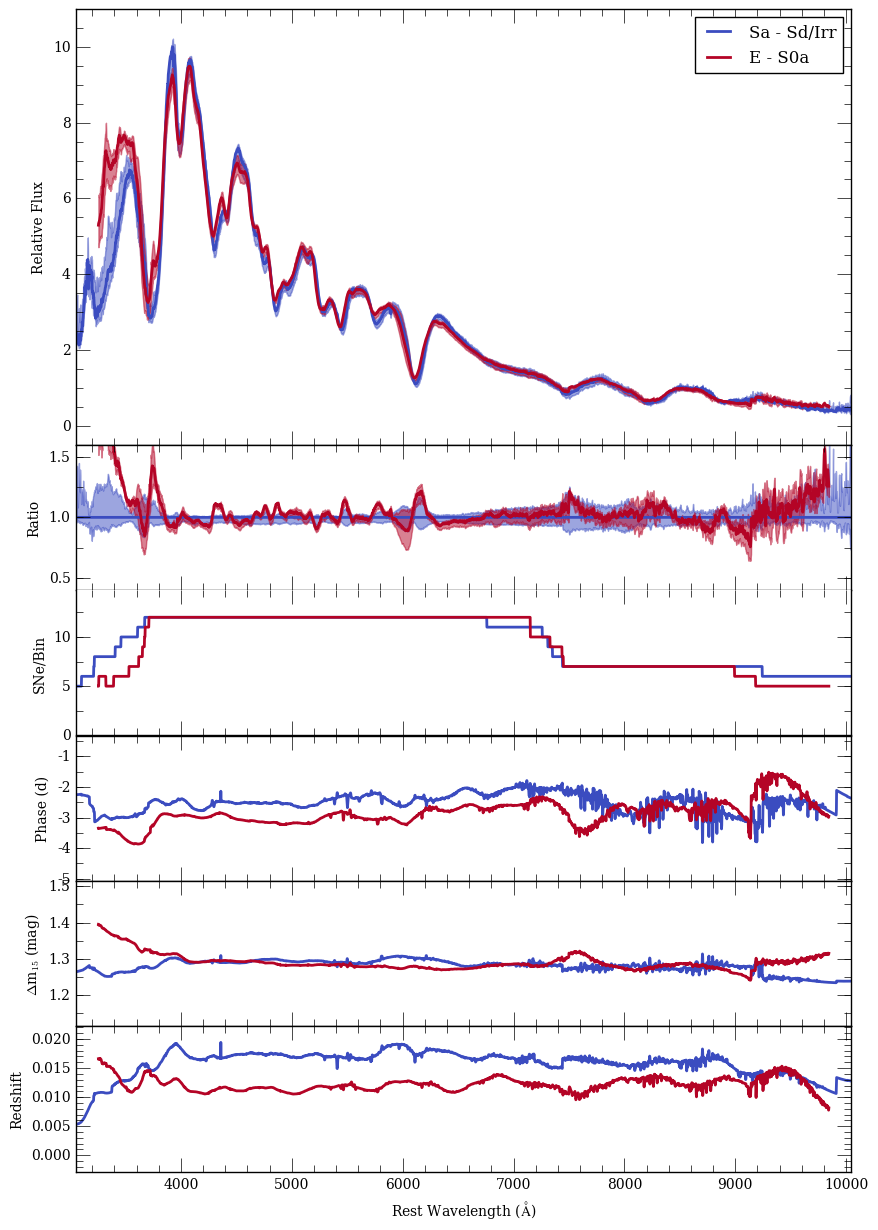

In [55]:
query_db.set_min_num_spec(comps_host_match_m3, 1)
# query_db.comparison_plot(comps_host_mid_dm15_m1week, scale_type= False, min_num_show=5, legend_labels = ['Sa - Sd/Irr','E - S0a'],zoom_ratio=True, savename='host_composites_updated/host_m3_dm13')
query_db.comparison_plot(comps_host_match_m3, scale_type= False, min_num_show=5, legend_labels = ['Sa - Sd/Irr','E - S0a'],zoom_ratio=True)

In [56]:
# diff_m3, err_m3, means_m3, varis_m3, EWs_m3 = sa.measure_comp_diff_EW(boot_sn_arrays_match_m3, w1=7600., w2=8200., w3=9000.)

In [57]:
# diff_m3_hk, err_m3_hk, means_m3_hk, varis_m3_hk, EWs_m3_hk = sa.measure_comp_diff_EW(boot_sn_arrays_match_m3, w1=3400., w2=3700., w3=4000.)

In [58]:
# query_host_mid_dm15_p1week = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 0 and phase <= 6 and NED_host >= 10 and ((dm15_source >= 1.2 and dm15_source < 1.45) or (dm15_from_fits >= 1.2 and dm15_from_fits < 1.45)) and Supernovae.SN != '2007bc'",
#                               "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 0 and phase <= 6 and NED_host between 1 and 9 and ((dm15_source >= 1.1 and dm15_source < 1.5) or (dm15_from_fits >= 1.1 and dm15_from_fits < 1.5)) and Supernovae.SN != '1997bp'"]
query_match_p3 = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= 0 and phase <= 6 and NED_host between 10 and 18 and ((dm15_source >= 1.2 and dm15_source < 1.45) or (dm15_from_fits >= 1.2 and dm15_from_fits < 1.45)) and Spectra.SN != '1999ac'",
                              "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= 0 and phase <= 6 and NED_host between 1 and 9 and ((dm15_source >= 1.1 and dm15_source < 1.5) or (dm15_from_fits >= 1.1 and dm15_from_fits < 1.5))"]

In [59]:
comps_host_match_p3, sn_arrays_match_p3, boot_sn_arrays_match_p3 = query_db.main(len(query_match_p3), query_match_p3, boot='b', medmean=1, selection='max_coverage', verbose=False, gini_balance=True)

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= 0 and phase <= 6 and NED_host between 10 and 18 and ((dm15_source >= 1.2 and dm15_source < 1.45) or (dm15_from_fits >= 1.2 and dm15_from_fits < 1.45)) and Spectra.SN != '1999ac'
58 Total Spectra found
105 questionable files currently ignored
(2, 'questionable spectra removed', 56, 'spectra left')
(0, 'Peculiar Ias removed', 56, 'spectra left')
47 valid spectra found
Arrays cleaned
2 spectra may have telluric contamination
13 total SNe
12 SNe with host corrections
Gini balancing...
Balanced after 11 iterations
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= 0 and phase <= 6 and NED_host between 1 and 9 and ((dm15_source >= 1.1 and dm15_source < 1.5) or (dm15_from_fits >= 1.1 and dm15_from_fits < 1.5))
68 Total Spectra found
105 questionable files currently ignored
(3, 'questionable spectra

Phase:  2.65202423397
dm15:  1.29755866778
Redshift:  0.015693095735
Morphology:  10.5983506831
Phase:  2.89204709919
dm15:  1.29581529592
Redshift:  0.0141113765246
Morphology:  7.11357309439


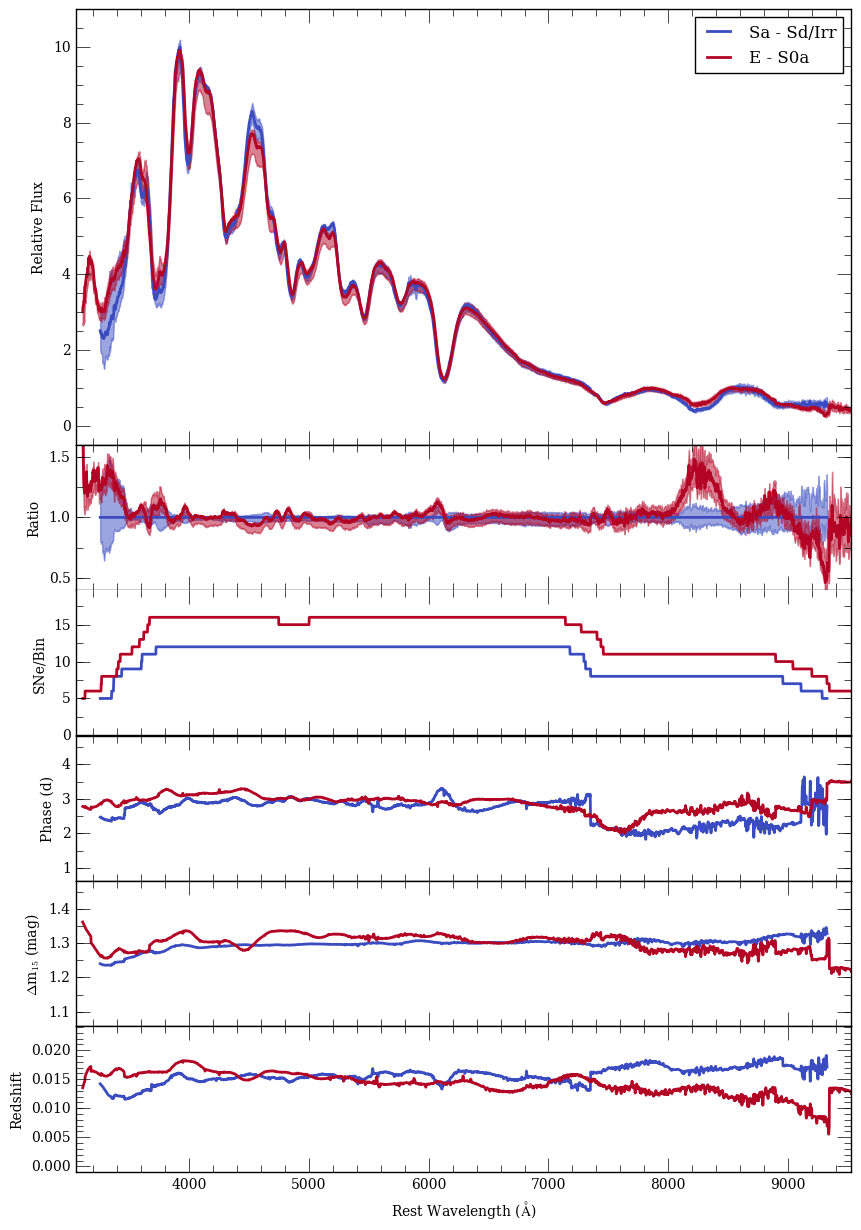

In [60]:
query_db.set_min_num_spec(comps_host_match_p3, 1)
# query_db.comparison_plot(comps_host_mid_dm15_p1week, scale_type= False, min_num_show=7, legend_labels = ['Sa - Sd/Irr','E - S0a'], zoom_ratio=True, savename='host_composites_updated/host_p3_dm13')
query_db.comparison_plot(comps_host_match_p3, scale_type= False, min_num_show=5, legend_labels = ['Sa - Sd/Irr','E - S0a'], zoom_ratio=True)

In [61]:
# diff_p3, err_p3, means_p3, varis_p3, EWs_p3 = sa.measure_comp_diff_EW(boot_sn_arrays_match_p3, w1=7600., w2=8200., w3=9000.)

In [62]:
# diff_p3_hk, err_p3_hk, means_p3_hk, varis_p3_hk, EWs_p3_hk = sa.measure_comp_diff_EW(boot_sn_arrays_match_p3, w1=3400., w2=3700., w3=4000.)

In [63]:
# query_host_mid_dm15_pmore = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 6 and phase <= 11 and NED_host >= 10 and ((dm15_source >= 1.17 and dm15_source < 1.48) or (dm15_from_fits >= 1.17 and dm15_from_fits < 1.48)) and Supernovae.SN != '2007bc' and Supernovae.SN != '2002er' and Supernovae.SN != '1996z' and Supernovae.SN != '2003cg'",
#                              "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 6 and phase <= 11 and NED_host between 1 and 9 and ((dm15_source >= 1.15 and dm15_source < 1.45) or (dm15_from_fits >= 1.15 and dm15_from_fits < 1.45)) and Supernovae.SN != '1997bp' and Supernovae.SN != '1999ac'"]
query_host_match_p8 = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= 6 and phase <= 11 and NED_host between 10 and 18 and ((dm15_source >= 1.17 and dm15_source < 1.48) or (dm15_from_fits >= 1.17 and dm15_from_fits < 1.48)) and Spectra.SN != '1999ac'",
                             "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= 6 and phase <= 11 and NED_host between 1 and 9 and ((dm15_source >= 1.15 and dm15_source < 1.45) or (dm15_from_fits >= 1.15 and dm15_from_fits < 1.45))"]

In [64]:
comps_host_match_p8, sn_arrays_match_p8, boot_sn_arrays_match_p8 = query_db.main(len(query_host_match_p8), query_host_match_p8, boot='b', medmean=1, verbose=False, gini_balance=True)

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= 6 and phase <= 11 and NED_host between 10 and 18 and ((dm15_source >= 1.17 and dm15_source < 1.48) or (dm15_from_fits >= 1.17 and dm15_from_fits < 1.48)) and Spectra.SN != '1999ac'
56 Total Spectra found
105 questionable files currently ignored
(1, 'questionable spectra removed', 55, 'spectra left')
(0, 'Peculiar Ias removed', 55, 'spectra left')
51 valid spectra found
Arrays cleaned
6 spectra may have telluric contamination
16 total SNe
13 SNe with host corrections
Gini balancing...
Balanced after 8 iterations
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= 6 and phase <= 11 and NED_host between 1 and 9 and ((dm15_source >= 1.15 and dm15_source < 1.45) or (dm15_from_fits >= 1.15 and dm15_from_fits < 1.45))
36 Total Spectra found
105 questionable files currently ignored
(4, 'questionable 

Phase:  8.23728842955
dm15:  1.27104500019
Redshift:  0.0135306345808
Morphology:  11.0135995984
Phase:  8.18050644547
dm15:  1.26284227754
Redshift:  0.0149802062956
Morphology:  6.86279387202


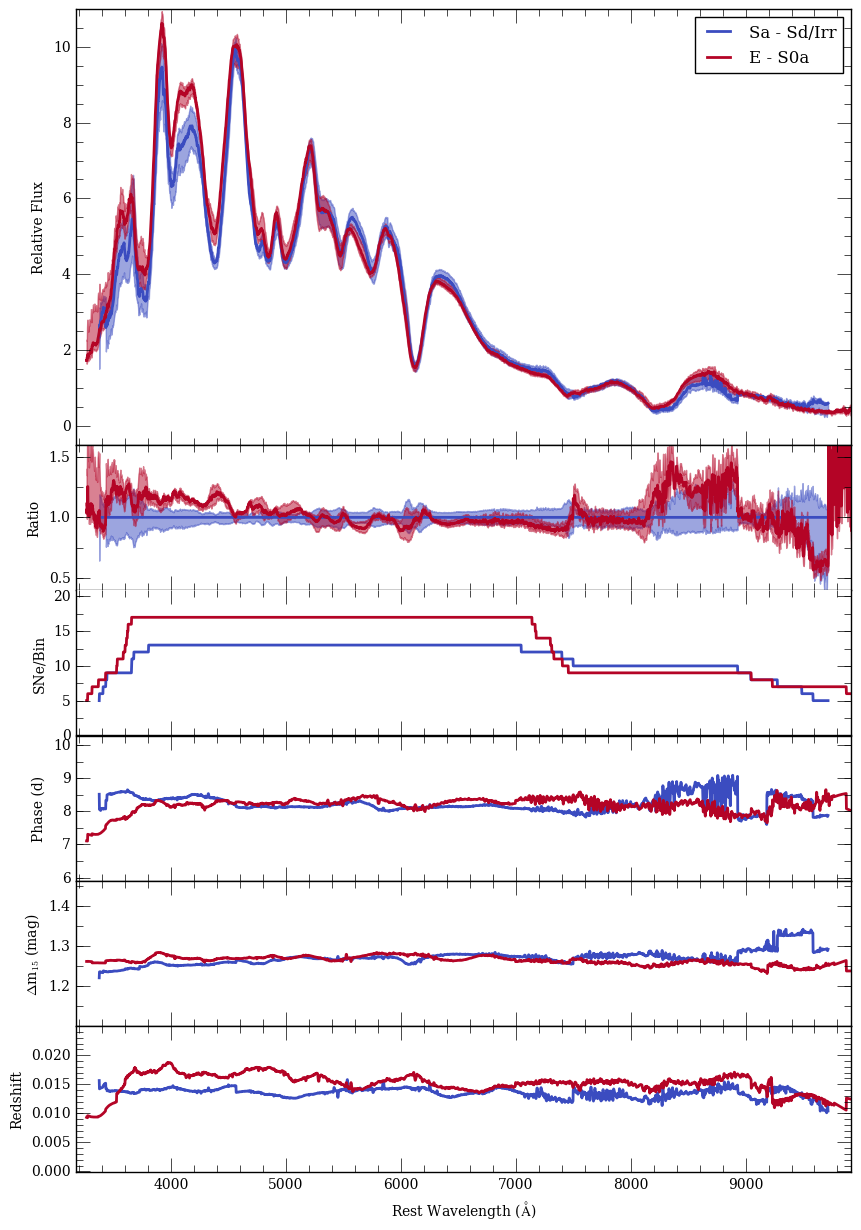

In [65]:
query_db.set_min_num_spec(comps_host_match_p8, 1)
# query_db.comparison_plot(comps_host_mid_dm15_pmore, scale_type= False, min_num_show=7, legend_labels = ['Sa - Sd/Irr','E - S0a'], zoom_ratio=True, savename='host_composites_updated/host_p9_dm13')
query_db.comparison_plot(comps_host_match_p8, scale_type= False, min_num_show=5, legend_labels = ['Sa - Sd/Irr','E - S0a'], zoom_ratio=True)

In [66]:
# diff_p8, err_p8, means_p8, varis_p8, EWs_p8 = sa.measure_comp_diff_EW(boot_sn_arrays_match_p8, w1=7600., w2=8200., w3=9000.)

In [67]:
# diff_p8_hk, err_p8_hk, means_p8_hk, varis_p8_hk, EWs_p8_hk = sa.measure_comp_diff_EW(boot_sn_arrays_match_p8, w1=3400., w2=3700., w3=4000.)

In [68]:
# plt.plot(boot_sn_arrays_match_p8[1][8].wavelength, boot_sn_arrays_match_p8[1][8].flux)
# plt.show()

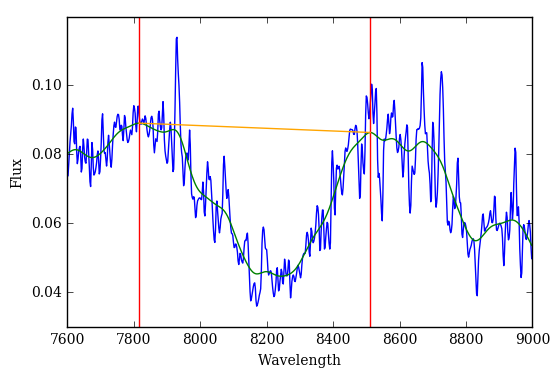

0 172.621012864 3.7342087845 2.97609694679 -1.39899115772


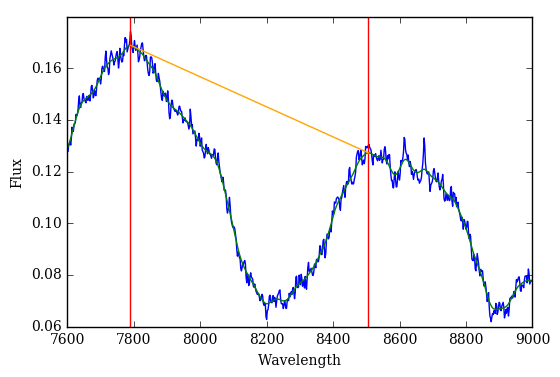

1 180.8280529 9.24197367123 0.986707247128 -5.86731764821


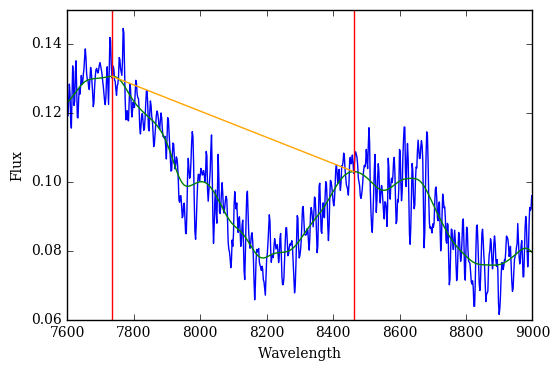

3 118.836120513 4.69643011058 2.5861492865 -4.37893710604


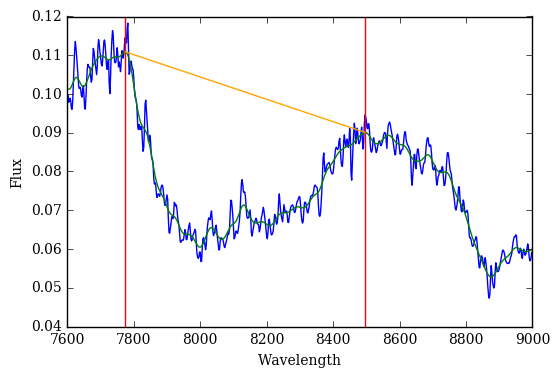

5 185.353561296 15.3190684677 2.40807345734 -4.71494455662


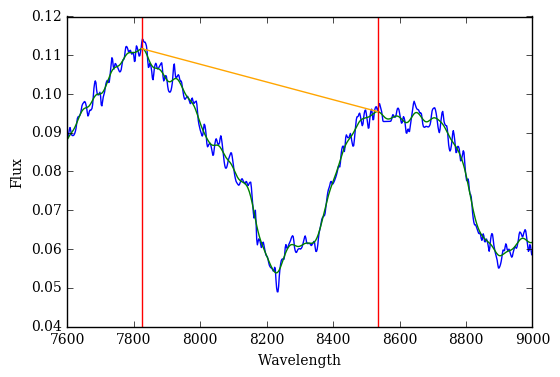

6 148.345369113 4.54136144821 0.890666663392 -0.304406358123


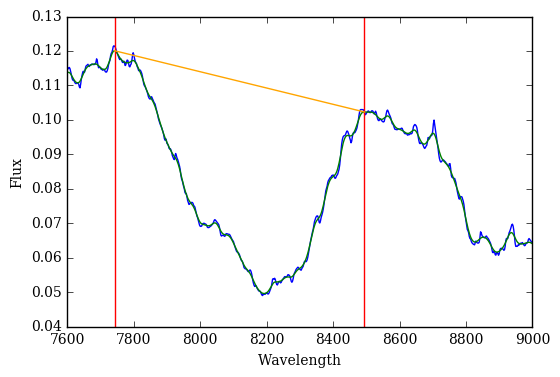

7 221.367050529 7.40970200708 1.17169787503 -4.11370569218


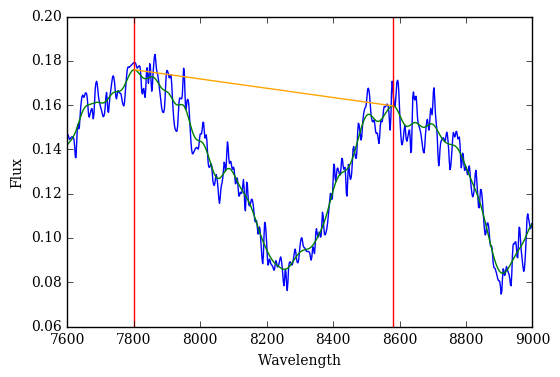

10 169.897183009 8.79547818483 1.62583290394 -2.3


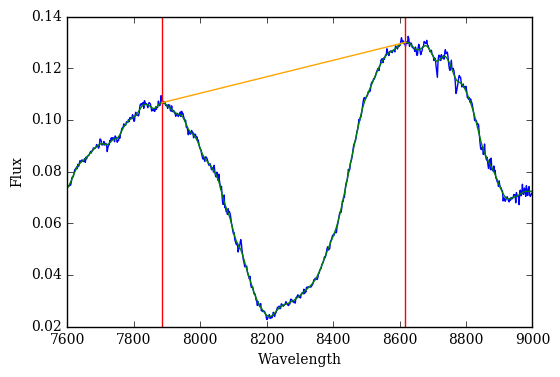

12 290.371499972 4.30456136958 2.31327580639 3.66293389078


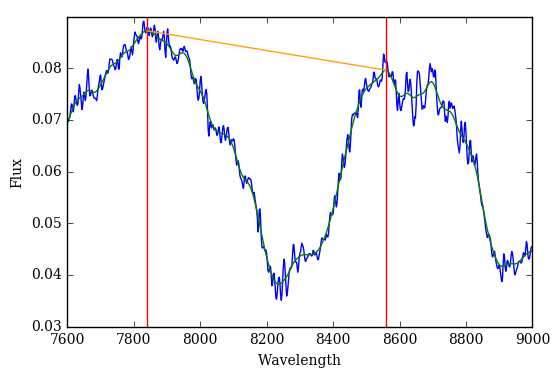

17 173.778682285 5.37057916356 1.56269049745 1.9617946392


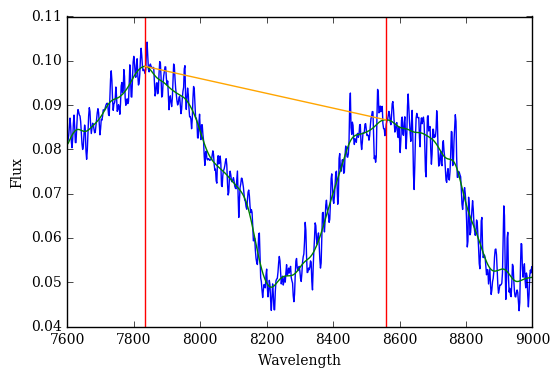

18 148.458326373 5.80012979324 1.8444516371 0.810754207343


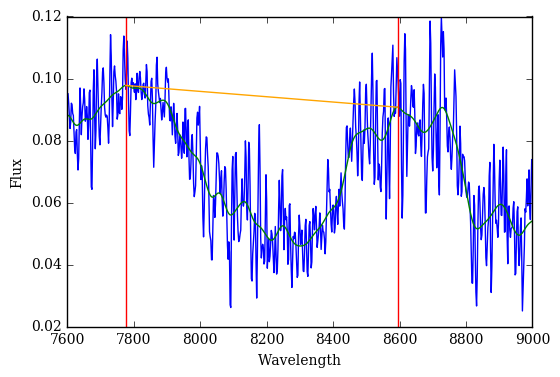

19 214.691410299 11.4867258271 5.74218997524 2.84700408799


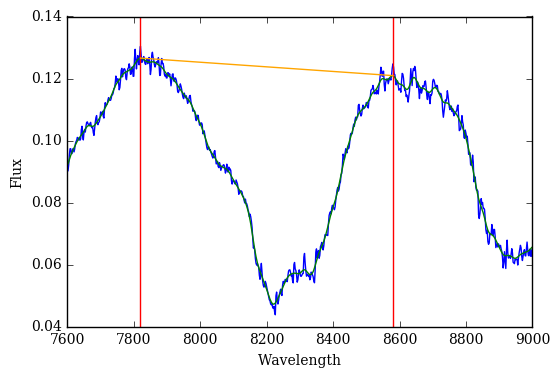

20 203.470469283 4.37784476672 2.56233530615 3.39129491299


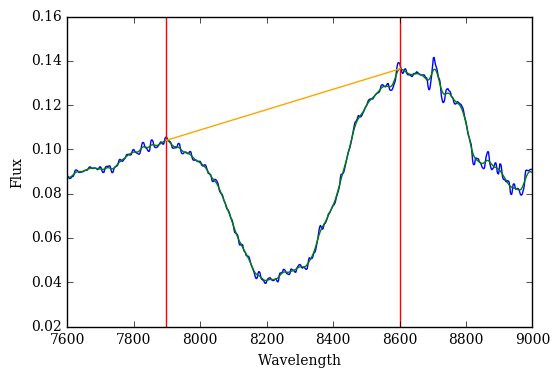

21 234.216162352 6.11860808891 3.12431269042 2.6127317275


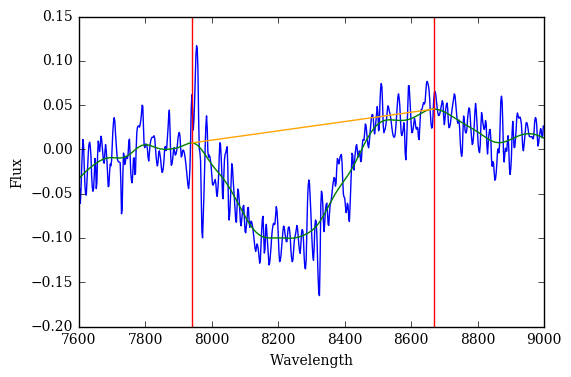

22 2008.80457042 2005.35917264 141.54394837 4.15787297081


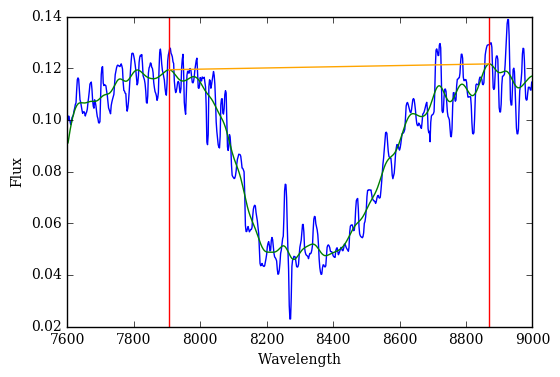

24 298.651611939 10.2006373514 4.69267710459 10.330022972


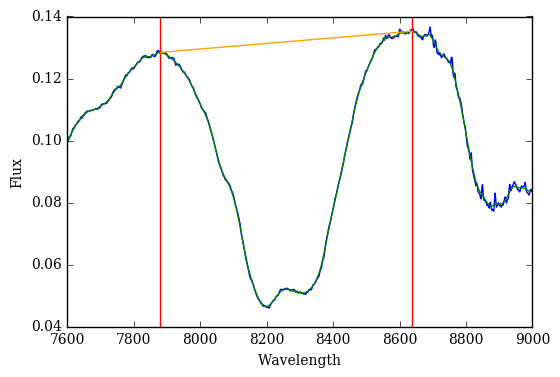

25 230.436074903 2.13994255754 0.704916849598 7.41060850556


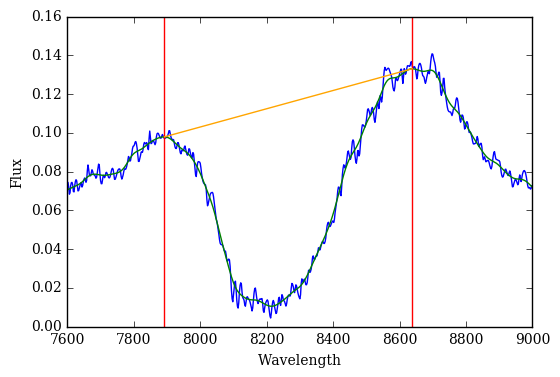

26 342.053647042 5.17759734651 1.63609243257 7.6055107352


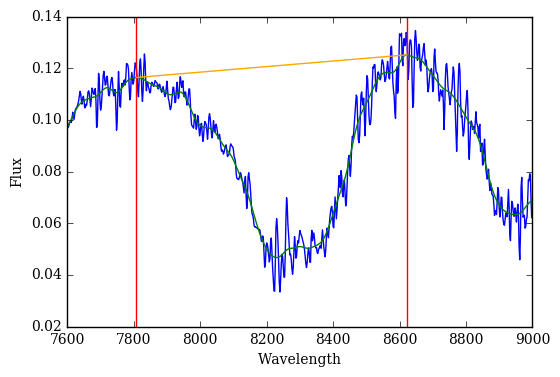

27 231.036235269 4.84804416962 2.42986461862 7.88703670126


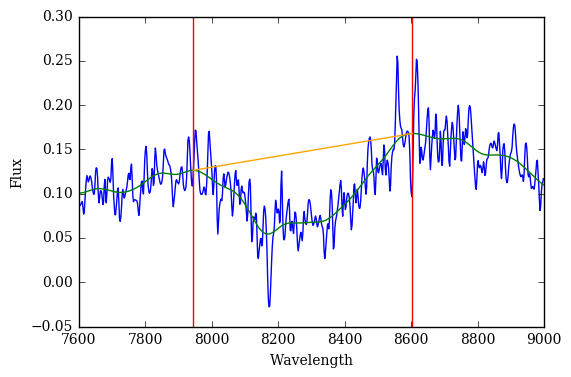

29 222.199881028 6.37172383056 6.40076283182 9.21026061888


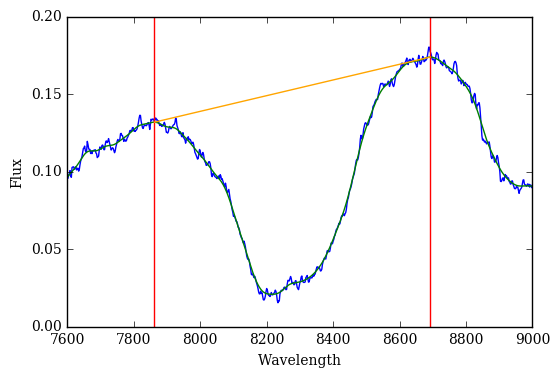

31 328.060810341 5.33958154547 1.74852458788 8.1888711873


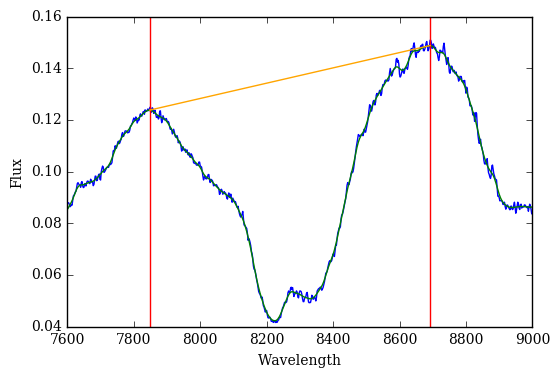

32 257.362703746 4.35957623481 1.4794286077 8.72215796562


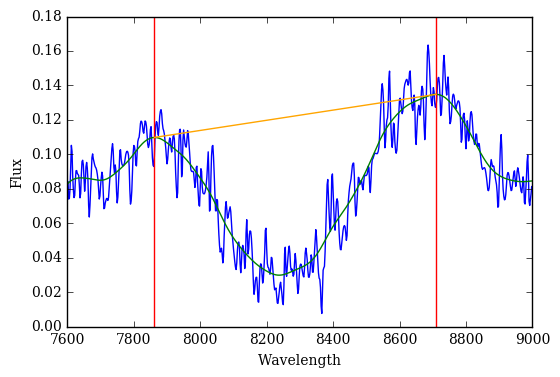

33 317.751305497 8.21043183952 3.01074492893 7.99914644733


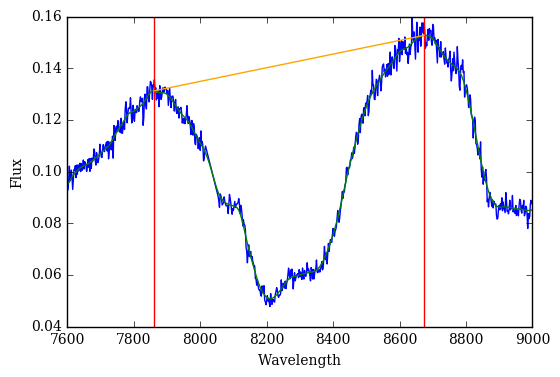

36 246.11542319 5.89919064195 2.03901169368 8.91826359492


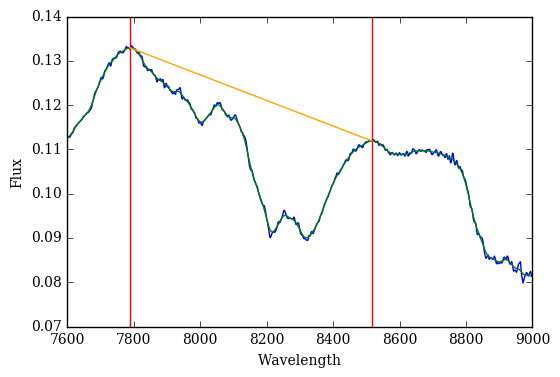

0 72.8620608757 4.48368657172 1.47711081598 -4.3234351706


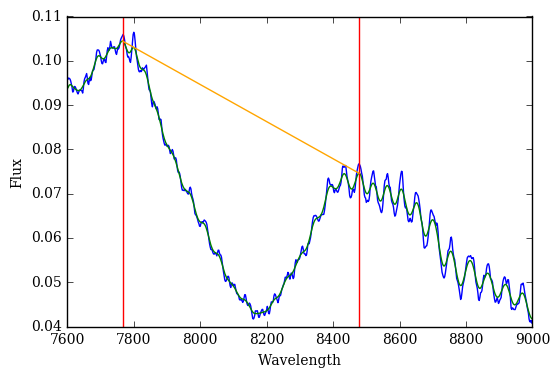

1 187.422803169 6.05987968604 3.71298988651 -4.99464458499


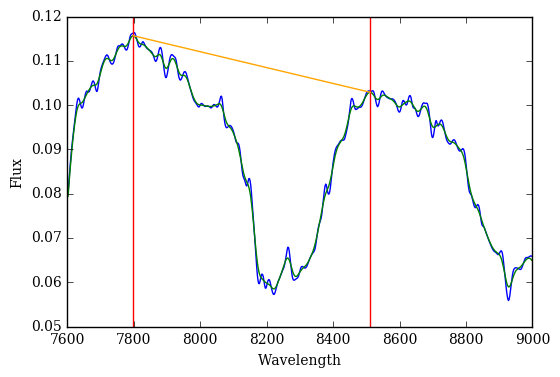

4 132.34124506 4.28044988949 1.17838192927 -1.96144716051


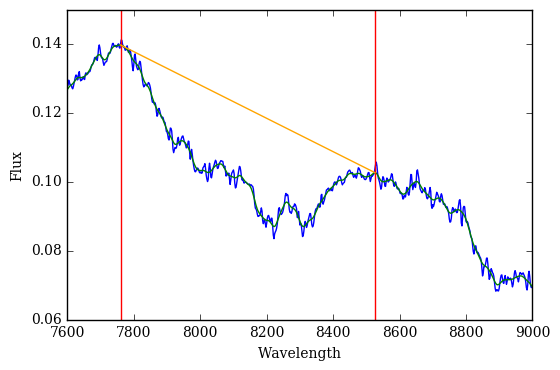

6 105.241376429 6.34728046573 3.69422684791 -3.94479626171


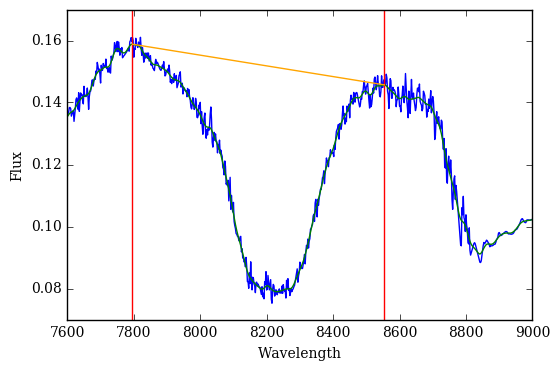

7 156.168546155 2.63586559438 1.93287741637 -2.56303101912


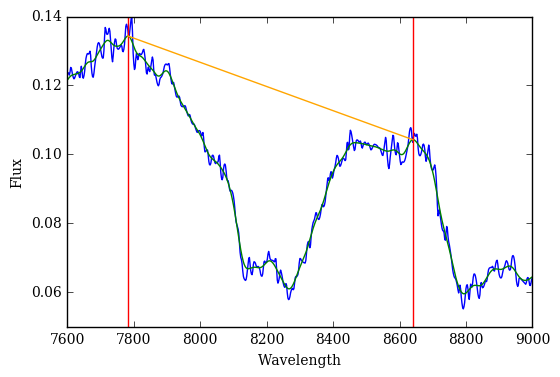

8 170.367239241 7.70817812923 9.33732160236 -0.175412464277


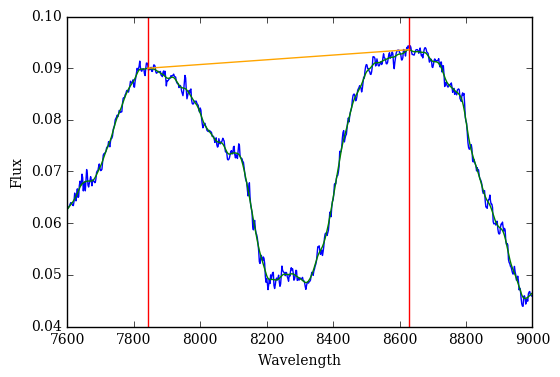

13 156.543511082 2.78004053316 1.22086410033 2.52425482421


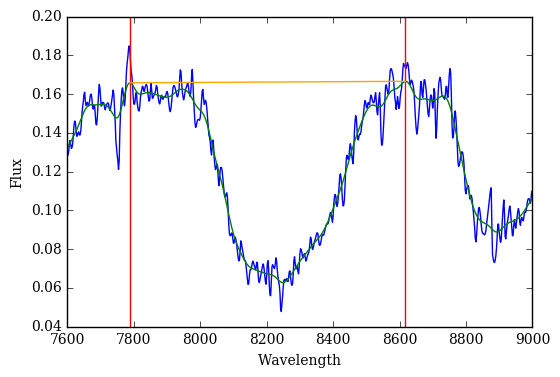

16 228.416464719 11.6013207089 2.08423034915 2.01092046637


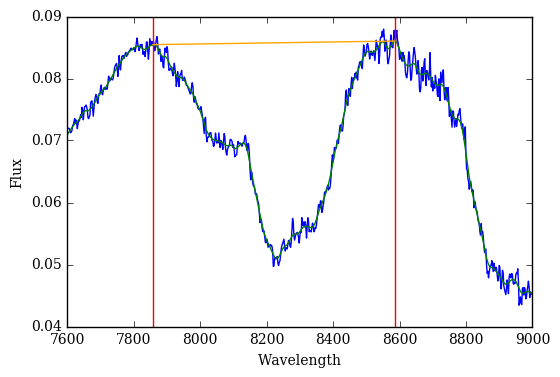

17 131.943202156 6.39845426901 1.08401430435 1.6709428843


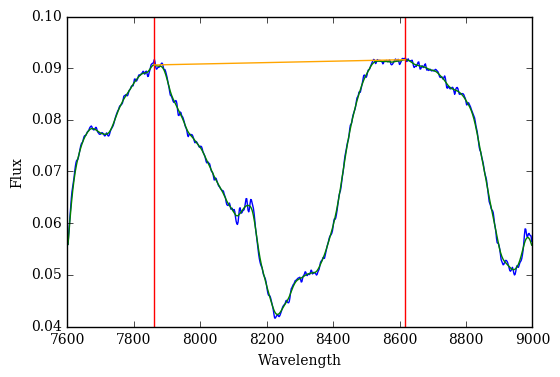

18 182.447189239 4.5883806083 0.897472187671 4.15642310583


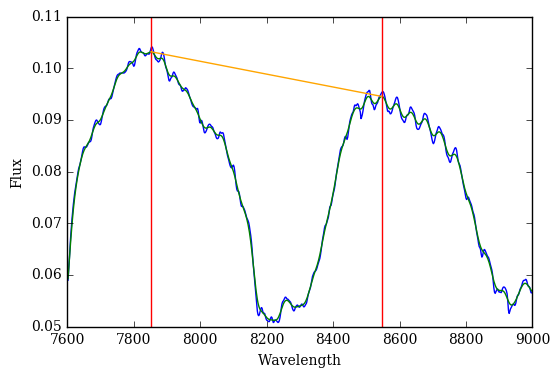

21 145.391337686 2.27356575137 4.2063091879 0.803854153192


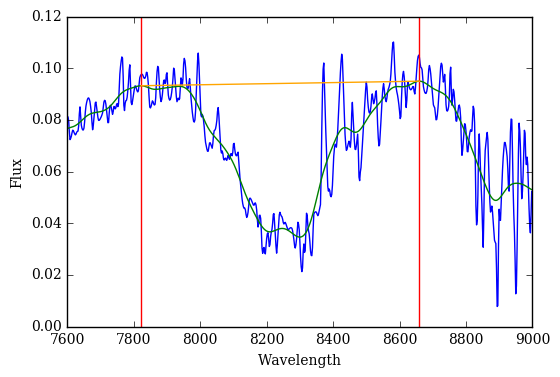

22 209.839289354 4.22899893277 3.15619283542 4.57449052925


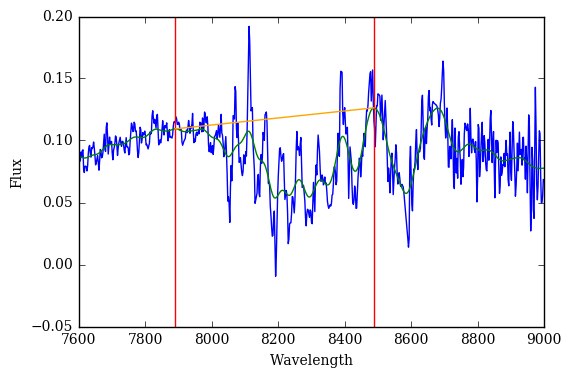

24 156.857631494 33.5131724319 16.3342525073 2.46950978961


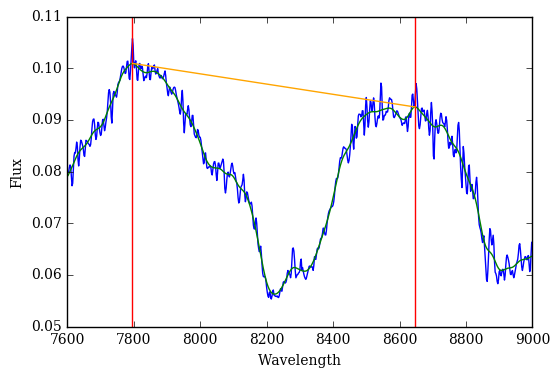

25 137.058074284 6.58711469472 1.55774492204 3.78115748569


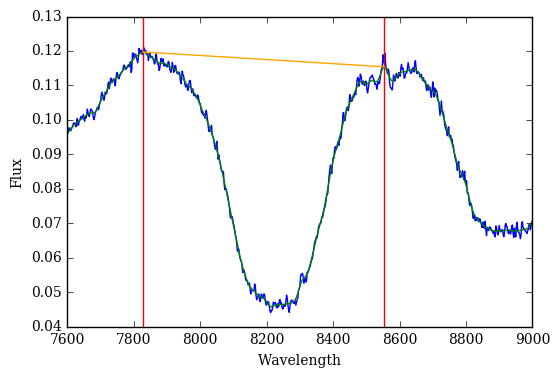

26 201.673878677 4.06035803929 1.60098937988 1.22955630358


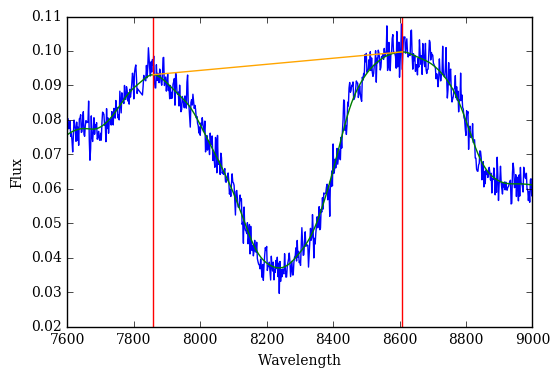

27 214.399512204 3.10404555822 23.2377259106 0.663105336289


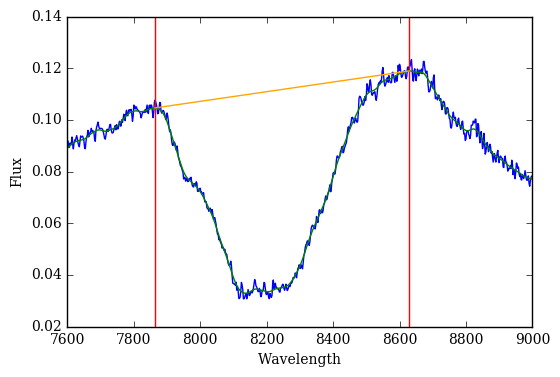

30 273.80461986 6.1997150636 1.84443197975 7.19648041526


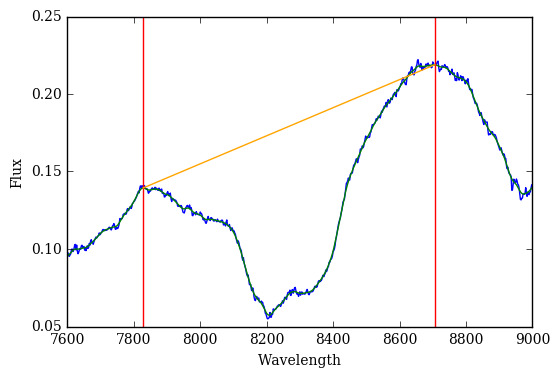

31 251.232557766 9.4504008536 3.444808358 9.66279041023


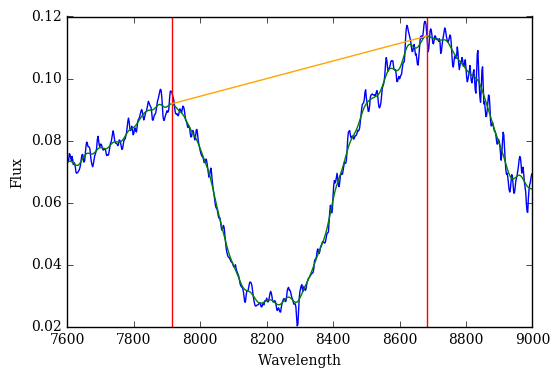

32 284.214872565 6.29987795078 1.40385066841 8.27889482048


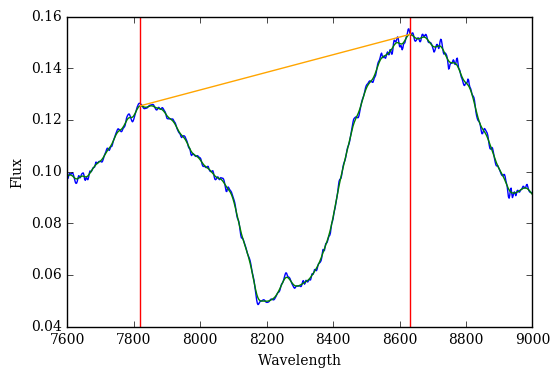

35 239.747784421 4.12317936691 2.79372343568 7.09817867292


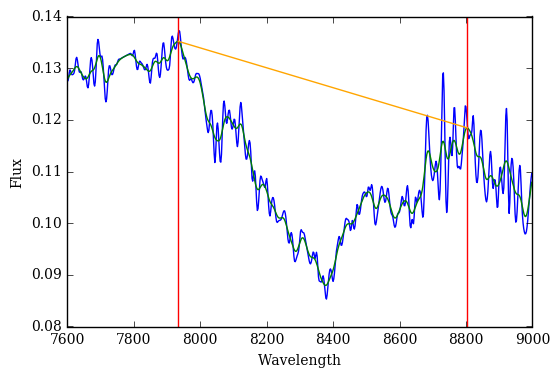

37 130.076463602 8.58860487277 2.63762226178 6.16557853806


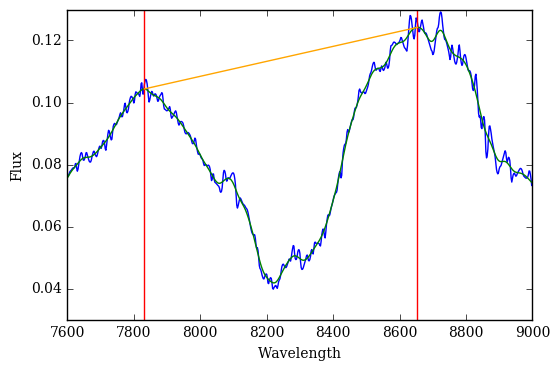

38 239.126889997 5.889830127 1.51811925059 9.99201497872


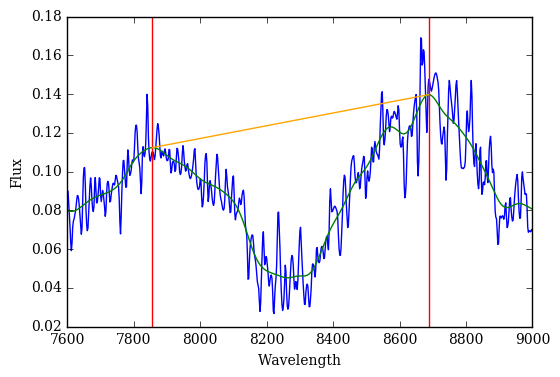

39 255.248469358 10.2815855631 3.52830408642 8.21913507266


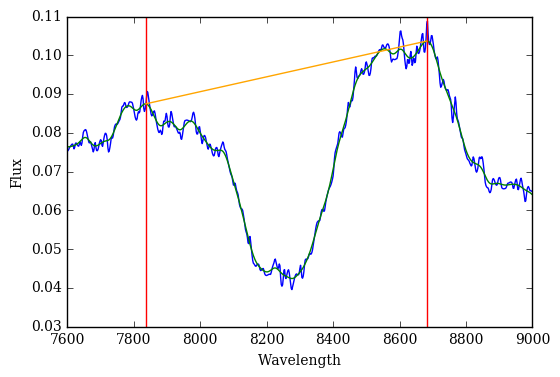

40 185.775747319 14.0208307351 2.41237827186 6.26386430128


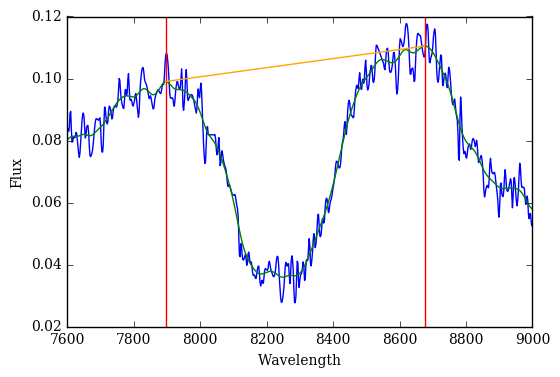

41 228.516945988 6.33494906348 1.49583524271 8.61284999197


In [207]:
EW_spec_list_late  = sn_arrays_match_m3[0] + sn_arrays_match_p3[0] + sn_arrays_match_p8[0]
EW_spec_list_early = sn_arrays_match_m3[1] + sn_arrays_match_p3[1] + sn_arrays_match_p8[1]

mean_EW_late, var_EW_late, EWs_late, err_late, phases_late = sa.measure_EWs(EW_spec_list_late, w1=7600., w2=8200., w3=9000., error=True)
mean_EW_early, var_EW_early, EWs_early, err_early, phases_early = sa.measure_EWs(EW_spec_list_early, w1=7600., w2=8200., w3=9000., error=True)

In [208]:
# mean_EW_late, var_EW_late, EWs_late, phases_late = sa.measure_EWs([EW_spec_list_late[5]], w1=7600., w2=8200., w3=9000., error=True)

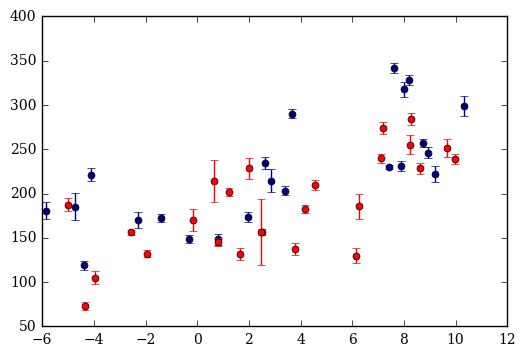

In [209]:
plt.errorbar(phases_late, EWs_late, yerr=err_late,  fmt='o', markersize=5, color = "#000080")
plt.errorbar(phases_early, EWs_early, yerr=err_early,  fmt='o', markersize=5, color = "red")
# plt.plot(phases_late, EWs_late, 'bo')
# plt.plot(phases_early, EWs_early, 'ro')
plt.ylim(50,400)
plt.show()

In [210]:
from scipy.optimize import curve_fit
from scipy.special import erf

In [211]:
phase_tot = np.concatenate((phases_late, phases_early))
EW_tot = np.concatenate((EWs_late, EWs_early))
err_tot = np.concatenate((err_late, err_early))

In [218]:
def lin(x, A, B):
    return A + B*x

def lin_const_slope(x, A):
    return A + 9.9946559642*x

def rms(y, yfit):
    return np.sqrt(np.sum((y-yfit)**2))

In [213]:
popt2, pcov2 = curve_fit(lin, phase_tot, EW_tot, p0=None, sigma=err_tot, absolute_sigma=True)

In [214]:
x = np.linspace(-6,12,1000)
inter = popt2[0]
slope = popt2[1]
print slope
y = inter + slope*x

9.9946559642


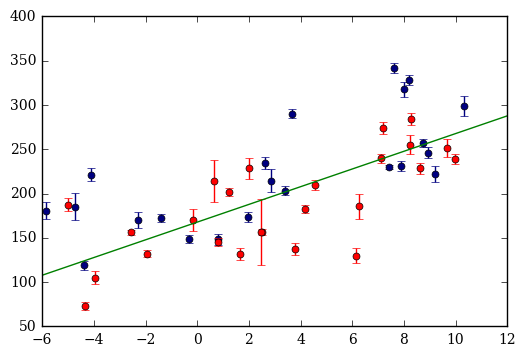

In [215]:
plt.errorbar(phases_late, EWs_late, yerr=err_late,  fmt='o', markersize=5, color = "#000080")
plt.errorbar(phases_early, EWs_early, yerr=err_early,  fmt='o', markersize=5, color = "red")
plt.plot(x,y,'g')
# plt.plot(phases_late, EWs_late, 'bo')
# plt.plot(phases_early, EWs_early, 'ro')
plt.ylim(50,400)
plt.show()

In [219]:
popt2_late, pcov2_late = curve_fit(lin_const_slope, phases_late, EWs_late, p0=None, sigma=err_late, absolute_sigma=True)
popt2_early, pcov2_early = curve_fit(lin_const_slope, phases_early, EWs_early, p0=None, sigma=err_early, absolute_sigma=True)

In [220]:
y_late = popt2_late[0] + slope*x
y_early = popt2_early[0] + slope*x

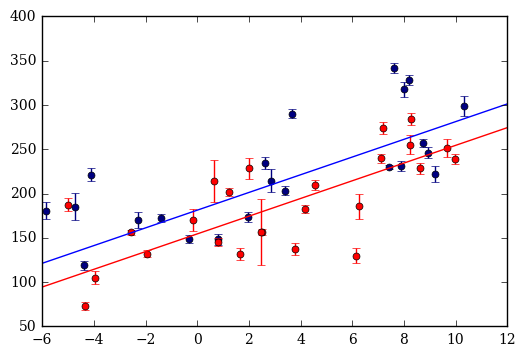

In [221]:
plt.errorbar(phases_late, EWs_late, yerr=err_late,  fmt='o', markersize=5, color = "#000080")
plt.errorbar(phases_early, EWs_early, yerr=err_early,  fmt='o', markersize=5, color = "red")
# plt.plot(x,y,'g')
plt.plot(x,y_late,'b')
plt.plot(x,y_early,'r')
# plt.plot(phases_late, EWs_late, 'bo')
# plt.plot(phases_early, EWs_early, 'ro')
plt.ylim(50,400)
plt.show()

In [222]:
ints_late = []
ints_early = []
for i in range(1000):
    delta_phase = np.random.normal(loc=0, scale=.5, size=len(phases_late))
    delta_EW = np.random.normal(loc=0, scale=err_late, size=len(EWs_late))
    new_phases_late = phases_late + delta_phase
    new_EWs_late = EWs_late + delta_EW
    
    delta_phase = np.random.normal(loc=0, scale=.5, size=len(phases_early))
    delta_EW = np.random.normal(loc=0, scale=err_early, size=len(EWs_early))
    new_phases_early = phases_early + delta_phase
    new_EWs_early = EWs_early + delta_EW
    
    popt2_late, pcov2_late = curve_fit(lin_const_slope, new_phases_late, new_EWs_late, p0=None, sigma=err_late, absolute_sigma=True)
    popt2_early, pcov2_early = curve_fit(lin_const_slope, new_phases_early, new_EWs_early, p0=None, sigma=err_early, absolute_sigma=True)
    ints_late.append(popt2_late[0])
    ints_early.append(popt2_early[0])

In [223]:
percentile = erf(1/np.sqrt(2.))
low_pc = 0.5 - percentile*0.5
up_pc = 0.5 + percentile*0.5
low_ind_late = np.round((len(ints_late)-1) * low_pc).astype(int)
up_ind_late = np.round((len(ints_late)-1) * up_pc).astype(int)
low_ind_early = np.round((len(ints_early)-1) * low_pc).astype(int)
up_ind_early = np.round((len(ints_early)-1) * up_pc).astype(int)

sort_ints_late_low = np.sort(ints_late)[low_ind_late]
sort_ints_late_up = np.sort(ints_late)[up_ind_late]
sort_ints_early_low = np.sort(ints_early)[low_ind_early]
sort_ints_early_up = np.sort(ints_early)[up_ind_early]
print sort_ints_late_low, sort_ints_late_up, sort_ints_early_low, sort_ints_early_up

179.166957476 183.111802278 152.612100444 156.358328952


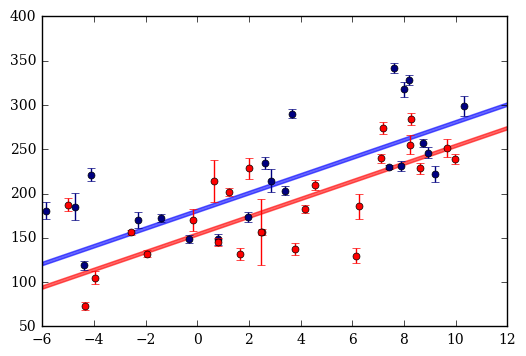

In [224]:
for i, e in enumerate(EWs_late):
    if e> 1000:
        err_late[i]=100
plt.errorbar(phases_late, EWs_late, yerr=err_late,  fmt='o', markersize=5, color = "#000080")
plt.errorbar(phases_early, EWs_early, yerr=err_early,  fmt='o', markersize=5, color = "red")
# plt.plot(x,y,'g')
# plt.plot(x,y_late,'b')
# plt.plot(x,y_early,'r')
plt.fill_between(x, sort_ints_late_low + slope*x, sort_ints_late_up + slope*x, color='b', alpha=.6)
plt.fill_between(x, sort_ints_early_low + slope*x, sort_ints_early_up + slope*x, color='r', alpha=.6)
# plt.plot(phases_late, EWs_late, 'bo')
# plt.plot(phases_early, EWs_early, 'ro')
plt.ylim(50,400)
plt.show()

In [225]:
def lnlike(theta, x, y, yerr):
    m, b, lnf = theta
    model = m * x + b
    inv_sigma2 = 1.0/(yerr**2 + model**2*np.exp(2*lnf))
    return -0.5*(np.sum((y-model)**2*inv_sigma2 - np.log(inv_sigma2)))

In [230]:
import scipy.optimize as op
nll = lambda *args: -lnlike(*args)

result_late = op.minimize(nll, [10,200, .5], args=(np.asarray(phases_late), np.asarray(EWs_late), np.asarray(err_late)))
m_ml_late, b_ml_late, lnf_ml_late = result_late["x"]
print m_ml_late, b_ml_late, np.exp(lnf_ml_late)

result_early = op.minimize(nll, [10,200, .5], args=(np.asarray(phases_early), np.asarray(EWs_early), np.asarray(err_early)))
m_ml_early, b_ml_early, lnf_ml_early = result_early["x"]
print m_ml_early, b_ml_early, np.exp(lnf_ml_early)

7.71133213517 199.469809959 0.187284480611
7.22763828374 163.487101303 0.215238195227


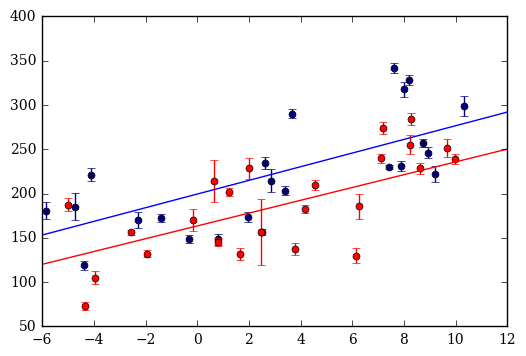

In [231]:
plt.errorbar(phases_late, EWs_late, yerr=err_late,  fmt='o', markersize=5, color = "#000080")
plt.errorbar(phases_early, EWs_early, yerr=err_early,  fmt='o', markersize=5, color = "red")
plt.plot(x,m_ml_late*x + b_ml_late,'b')
plt.plot(x,m_ml_early*x + b_ml_early,'r')
# plt.plot(x,y_late,'b')
# plt.plot(x,y_early,'r')
# plt.fill_between(x, sort_ints_late_low + slope*x, sort_ints_late_up + slope*x, color='b', alpha=.6)
# plt.fill_between(x, sort_ints_early_low + slope*x, sort_ints_early_up + slope*x, color='r', alpha=.6)
# plt.plot(phases_late, EWs_late, 'bo')
# plt.plot(phases_early, EWs_early, 'ro')
plt.ylim(50,400)
plt.show()

In [251]:
import emcee
def lnprior(theta):
    m, b, lnf = theta
    if -10.0 < m < 50. and 0.0 < b < 300.0 and -10.0 < lnf < 1.0:
        return 0.0
    return -np.inf

def lnprob(theta, x, y, yerr):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, x, y, yerr)

In [252]:
ndim, nwalkers = 3, 100
pos_late = [result_late["x"] + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]
pos_early = [result_early["x"] + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

In [253]:
sampler_late = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(np.asarray(phases_late), np.asarray(EWs_late), np.asarray(err_late)))
sampler_early = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(np.asarray(phases_early), np.asarray(EWs_early), np.asarray(err_early)))

sampler_late.run_mcmc(pos_late, 500)
sampler_early.run_mcmc(pos_early, 500)

(array([[   5.25756835,  187.72010362,   -1.31972124],
        [   6.85585554,  157.1737689 ,   -1.35412777],
        [   7.76176464,  170.26566024,   -1.62934735],
        [   6.86105813,  175.25269989,   -1.66171581],
        [   9.22049398,  165.03222175,   -1.20440772],
        [   5.80333542,  162.50293456,   -1.39671038],
        [   7.24407201,  167.89249705,   -1.67588454],
        [   3.31656729,  167.13815032,   -1.00709553],
        [   9.03089464,  153.39097637,   -1.34996367],
        [   7.46703537,  148.75105103,   -1.40633639],
        [   6.48934332,  170.57418536,   -1.45978705],
        [   4.89896203,  168.72917004,   -1.1321347 ],
        [   6.56480233,  173.34868448,   -1.6664053 ],
        [  10.53065485,  158.42632825,   -1.47853427],
        [   9.38027836,  159.87232275,   -1.33418614],
        [   9.04529755,  165.3317898 ,   -1.43629872],
        [   6.89638075,  154.23683967,   -1.36847162],
        [   6.21840598,  160.61267279,   -1.57463204],
        [ 

In [255]:
samples_late = sampler_late.chain[:, 50:, :].reshape((-1, ndim))
samples_early = sampler_early.chain[:, 50:, :].reshape((-1, ndim))

samples_late[:, 2] = np.exp(samples_late[:, 2])
m_mcmc_late, b_mcmc_late, f_mcmc_late = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
                                                         zip(*np.percentile(samples_late, [32, 50, 68],
                                                            axis=0)))
print m_mcmc_late, b_mcmc_late, f_mcmc_late

samples_early[:, 2] = np.exp(samples_early[:, 2])
m_mcmc_early, b_mcmc_early, f_mcmc_early = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
                                                         zip(*np.percentile(samples_early, [32, 50, 68],
                                                            axis=0)))
print m_mcmc_early, b_mcmc_early, f_mcmc_early

(7.5924777717911844, 0.76458487645015083, 0.74831240389330134) (199.65197425921014, 4.0774811910285393, 4.0848797652787994) (0.19949757264409576, 0.017564325784895585, 0.015185649557689307)
(7.1578581138431403, 0.7370121738076163, 0.75661028670559638) (164.10170090517744, 3.8203187520425104, 3.7508125754213211) (0.22741365252279599, 0.018581751290451975, 0.01669444011656393)


In [ ]:
plt.rc('font', family='serif')
plt.figure(num = 1, dpi = 100, figsize = [10,7])
plt.minorticks_on()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('$\Delta m_{15}$ (B) (mag)', fontsize = 20)
plt.ylabel('B - V (mag)', fontsize = 20)
plt.tick_params(
    which='major', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=20)
plt.tick_params(
    which='minor', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=10)
# for m, b, lnf in samples_late[np.random.randint(len(samples_late), size=100)]:
#     plt.plot(x, m*x+b, color="#000080", alpha=0.1)
# for m, b, lnf in samples_early[np.random.randint(len(samples_early), size=100)]:
#     plt.plot(x, m*x+b, color="#cc0000", alpha=0.1)
plt.errorbar(phases_late, EWs_late, yerr=err_late,  fmt='o', markersize=10, color = "#000080")
plt.errorbar(phases_early, EWs_early, yerr=err_early,  fmt='o', markersize=10, color = "#cc0000")
plt.plot(x,m_mcmc_late[0]*x + b_mcmc_late[0],'#000080')
plt.plot(x,m_mcmc_early[0]*x + b_mcmc_early[0],'#cc0000')
plt.ylim(50,375)
plt.xlabel("Rest-Frame Days Since B-Band Maximum")
plt.ylabel("EW (Ca II NIR Triplet)")
plt.show()

# Max-High dm15 Matched

In [14]:
# query_host_high_dm15 = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 10 and 18 and ((dm15_source > 1.15 and dm15_source < 1.9) or (dm15_from_fits > 1.15 and dm15_from_fits < 1.9))",
#                         "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 1 and 9 and ((dm15_source > 1.15 and dm15_source < 1.5) or (dm15_from_fits > 1.15 and dm15_from_fits < 1.5)) and Supernovae.SN != '2008ia'"]
query_host_high_dm15 = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 10 and 18 and ((dm15_source > 1.25 and dm15_source < 1.8) or (dm15_from_fits > 1.25 and dm15_from_fits < 1.8))",
                        "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 1 and 9 and ((dm15_source > 1.2 and dm15_source < 1.45) or (dm15_from_fits > 1.3 and dm15_from_fits < 1.45))"]

In [15]:
# comps_host_high_dm15, sn_arrays_high_dm15, boot_sn_arrays_high_dm15 = query_db.main(len(query_host_high_dm15), query_host_high_dm15, boot='b', medmean=1, selection='choose_bluest')
comps_host_high_dm15, sn_arrays_high_dm15, boot_sn_arrays_high_dm15 = query_db.main(len(query_host_high_dm15), query_host_high_dm15, boot='b', medmean=1, selection='max_coverage', verbose=False, gini_balance=True)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 10 and 18 and ((dm15_source > 1.25 and dm15_source < 1.8) or (dm15_from_fits > 1.25 and dm15_from_fits < 1.8))
172 questionable files currently ignored
Generate variance failed for:  [u'sn2004ef-20040914-hst.flm', u'sn2004ef-20040918-hst.flm']
4 questionable spectra removed 54 spectra left
5 Peculiar Ias removed 49 spectra left
39 spectra with host corrections
172 questionable files currently ignored
10 valid SNe found
Arrays cleaned
1 spectra may have telluric contamination
10 SNs with host corrections
Creating composite...
Gini balancing...
Balanced after 2 iterations
Done.
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 1 and 9 and ((dm15_source > 1.2 and dm15_source < 1.45) or (dm

-0.162779726842
1.34276533441
0.344992531562
1.34267830931


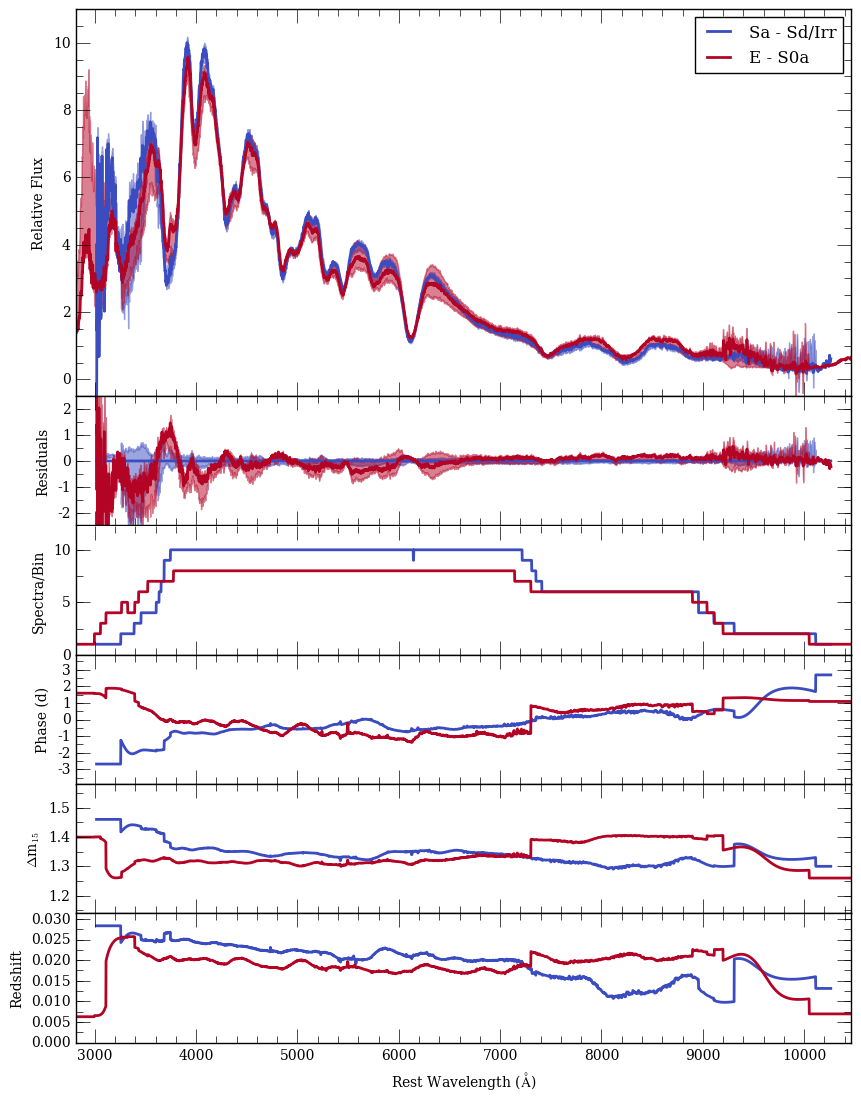

In [16]:
# composite.optimize_scales(comps_host_high_dm15, comps_host_high_dm15[0], True)
query_db.set_min_num_spec(comps_host_high_dm15, 1)
# query_db.comparison_plot(comps_host_high_dm15, scale_type=True)
query_db.comparison_plot(comps_host_high_dm15, scale_type=False, min_num_show=1, min_num_scale=5, legend_labels = ['Sa - Sd/Irr','E - S0a'], zoom_ratio=True, savename='host_composites_updated/high_dm15_host_max')

# +1 Week-Low dm15 Matched

In [17]:
query_host_low_dm15_p1week = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 5 and phase <= 8 and NED_host between 10 and 18 and ((dm15_source > .95 and dm15_source < 1.1) or (dm15_from_fits > .95 and dm15_from_fits < 1.1))",
                       "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 5 and phase <= 9 and NED_host between 1 and 9 and ((dm15_source < 1.15 or dm15_from_fits < 1.15))"]

In [18]:
comps_host_low_dm15_p1week, sn_arrays_low_dm15_p1week, boot_sn_arrays_low_dm15_p1week = query_db.main(len(query_host_low_dm15_p1week), query_host_low_dm15_p1week, boot='b', medmean=1, selection='max_coverage', verbose=False, gini_balance=True)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 5 and phase <= 8 and NED_host between 10 and 18 and ((dm15_source > .95 and dm15_source < 1.1) or (dm15_from_fits > .95 and dm15_from_fits < 1.1))
172 questionable files currently ignored
1 questionable spectra removed 29 spectra left
0 Peculiar Ias removed 29 spectra left
26 spectra with host corrections
172 questionable files currently ignored
17 valid SNe found
Arrays cleaned
17 spectra may have telluric contamination
17 SNs with host corrections
Creating composite...
Gini balancing...
Balanced after 5 iterations
Done.
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 5 and phase <= 9 and NED_host between 1 and 9 and ((dm15_source < 1.15 or dm15_from_fits < 1.15))
172 questionable files currently ignored
0 questionable spectra removed 11 spectra left
0 Peculia

6.32394186246
1.02985627134
6.83483977494
1.06079003646


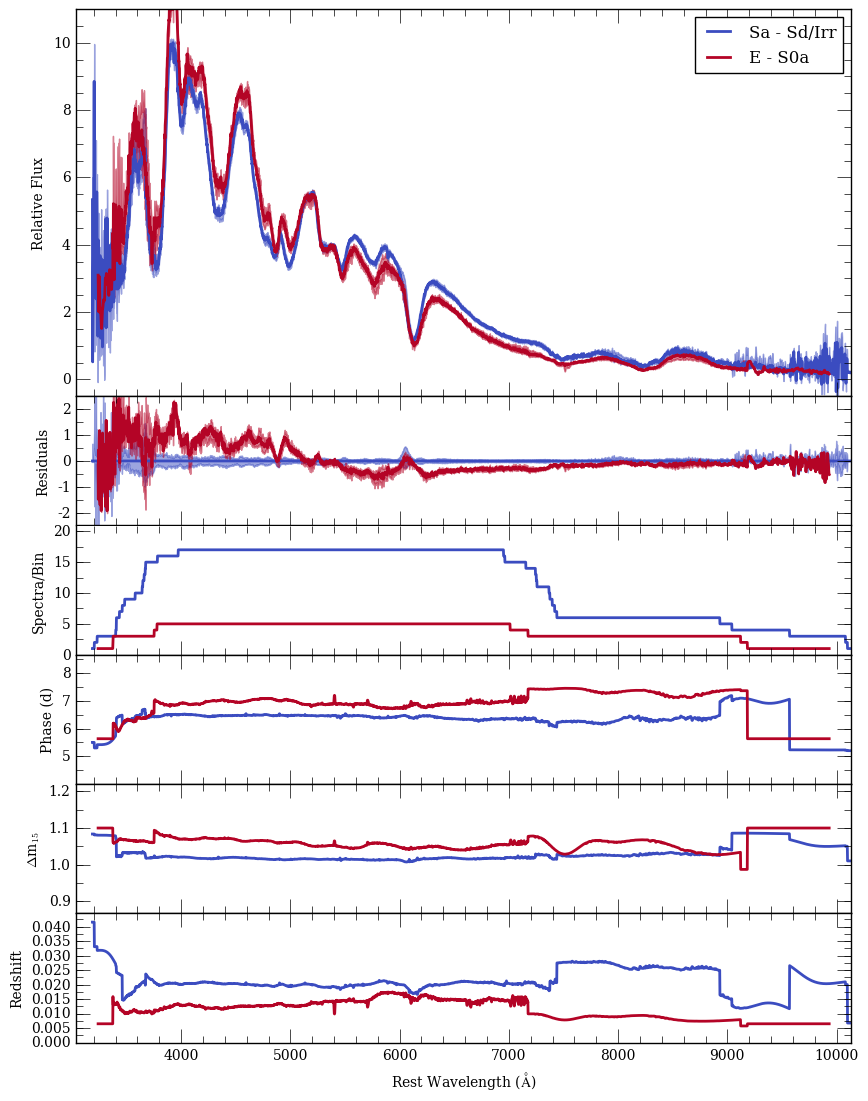

In [19]:
# composite.optimize_scales(comps_host_high_dm15, comps_host_high_dm15[0], True)
query_db.set_min_num_spec(comps_host_low_dm15_p1week, 1)
# query_db.comparison_plot(comps_host_high_dm15, scale_type=True)
query_db.comparison_plot(comps_host_low_dm15_p1week, scale_type=False, min_num_show=1, min_num_scale=5, legend_labels = ['Sa - Sd/Irr','E - S0a'], savename='host_composites_updated/low_dm15_host_p1week')

# +1 Week-High dm15 Matched

In [20]:
query_host_high_dm15_p1week = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 5 and phase <= 9 and NED_host between 10 and 18 and ((dm15_source > 1.25 and dm15_source < 1.8) or (dm15_from_fits > 1.25 and dm15_from_fits < 1.8))",
                        "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 5 and phase <= 9 and NED_host between 1 and 9 and ((dm15_source > 1.3 and dm15_source < 1.45) or (dm15_from_fits > 1.3 and dm15_from_fits < 1.45)) and Supernovae.SN != '2008ia'"]

In [21]:
comps_host_high_dm15_p1week, sn_arrays_high_dm15, boot_sn_arrays_high_dm15 = query_db.main(len(query_host_high_dm15_p1week), query_host_high_dm15_p1week, boot='b', medmean=1, selection='max_coverage', verbose=False, gini_balance=True)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 5 and phase <= 9 and NED_host between 10 and 18 and ((dm15_source > 1.25 and dm15_source < 1.8) or (dm15_from_fits > 1.25 and dm15_from_fits < 1.8))
172 questionable files currently ignored
1 questionable spectra removed 26 spectra left
0 Peculiar Ias removed 26 spectra left
21 spectra with host corrections
172 questionable files currently ignored
8 valid SNe found
Arrays cleaned
1 spectra may have telluric contamination
8 SNs with host corrections
Creating composite...
Gini balancing...
Balanced after 5 iterations
Done.
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 5 and phase <= 9 and NED_host between 1 and 9 and ((dm15_source > 1.3 and dm15_source < 1.45) or (dm15_from_fits > 1.3 and dm15_from_fits < 1.45)) and Supernovae.SN != '2008ia'
172 questionable fi

6.92800519464
1.36045603157
7.58052346057
1.38911758851


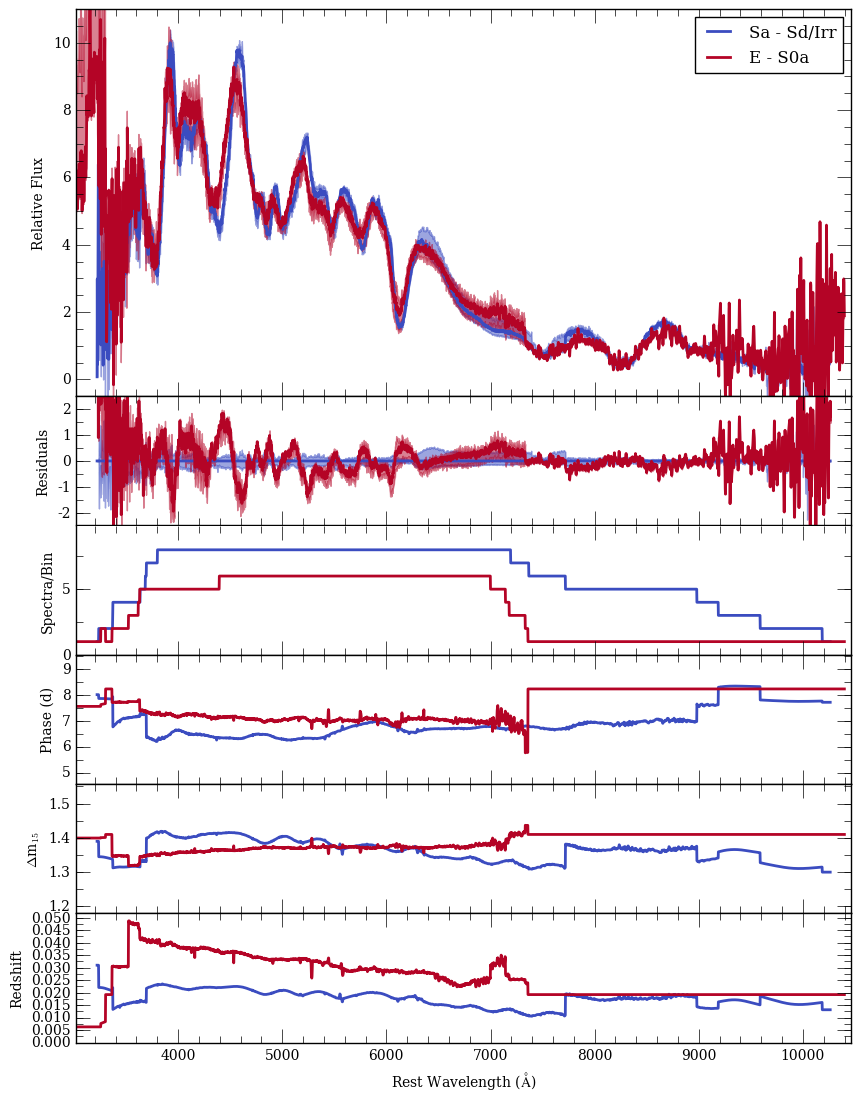

In [22]:
# composite.optimize_scales(comps_host_high_dm15, comps_host_high_dm15[0], True)
query_db.set_min_num_spec(comps_host_high_dm15_p1week, 1)
# query_db.comparison_plot(comps_host_high_dm15, scale_type=True)
query_db.comparison_plot(comps_host_high_dm15_p1week, scale_type=False, min_num_show=1, min_num_scale=5, legend_labels = ['Sa - Sd/Irr','E - S0a'], savename='host_composites_updated/high_dm15_host_p1week')

# -1 Week-Low dm15 Matched

In [23]:
query_host_low_dm15_m1week = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -10 and phase <= -5 and NED_host between 10 and 18 and ((dm15_source > .95 and dm15_source < 1.1) or (dm15_from_fits > .95 and dm15_from_fits < 1.1))",
                       "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -10 and phase <= -5 and NED_host between 1 and 9 and ((dm15_source < 1.15 or dm15_from_fits < 1.15))"]

In [24]:
comps_host_low_dm15_m1week, sn_arrays_low_dm15_m1week, boot_sn_arrays_low_dm15_m1week = query_db.main(len(query_host_low_dm15_m1week), query_host_low_dm15_m1week, boot='b', medmean=1, selection='max_coverage', verbose=False, gini_balance=True)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -10 and phase <= -5 and NED_host between 10 and 18 and ((dm15_source > .95 and dm15_source < 1.1) or (dm15_from_fits > .95 and dm15_from_fits < 1.1))
172 questionable files currently ignored
2 questionable spectra removed 48 spectra left
0 Peculiar Ias removed 48 spectra left
46 spectra with host corrections
172 questionable files currently ignored
18 valid SNe found
Arrays cleaned
1 spectra may have telluric contamination
18 SNs with host corrections
Creating composite...
Gini balancing...
Balanced after 3 iterations
Done.
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -10 and phase <= -5 and NED_host between 1 and 9 and ((dm15_source < 1.15 or dm15_from_fits < 1.15))
172 questionable files currently ignored
Generate variance failed for:  [u'sn2005cf-20050603

-6.80056333422
1.03873962341
-6.46939975844
1.01990214877


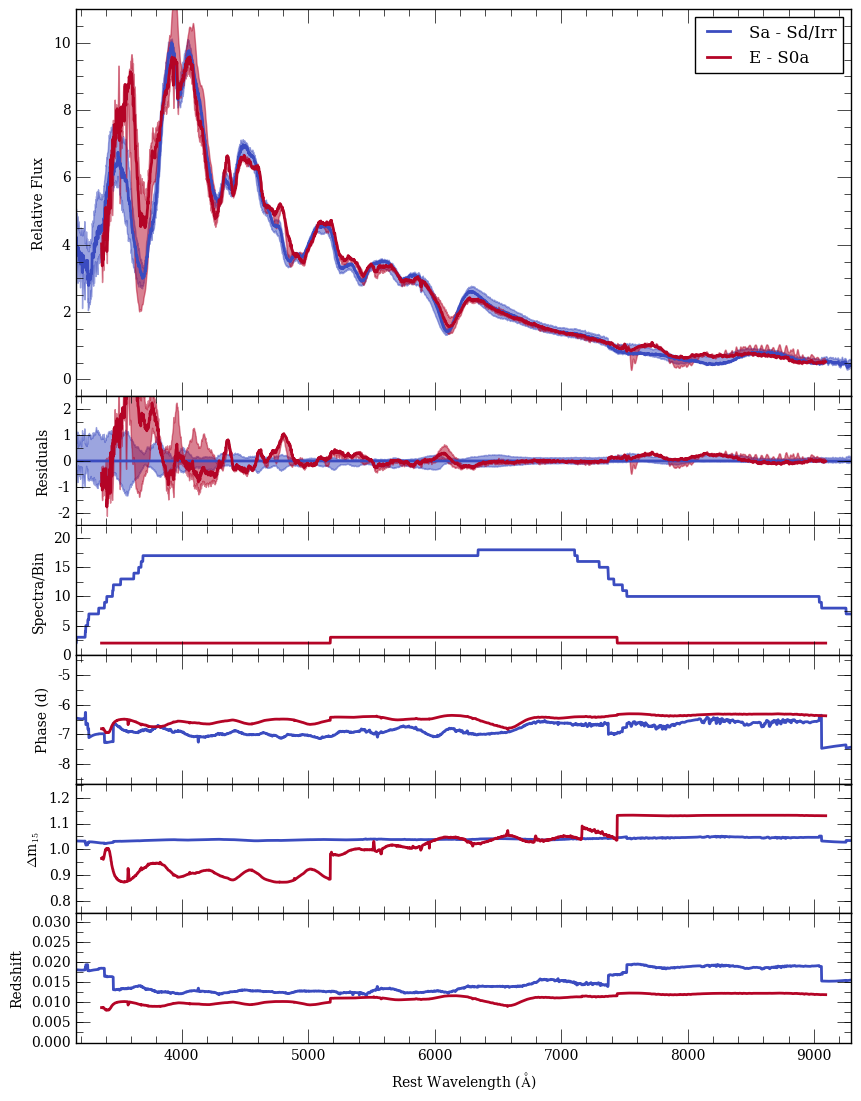

In [25]:
# composite.optimize_scales(comps_host_high_dm15, comps_host_high_dm15[0], True)
query_db.set_min_num_spec(comps_host_low_dm15_m1week, 1)
# query_db.comparison_plot(comps_host_high_dm15, scale_type=True)
query_db.comparison_plot(comps_host_low_dm15_m1week, scale_type=False, min_num_show=2, min_num_scale=2, legend_labels = ['Sa - Sd/Irr','E - S0a'], savename='host_composites_updated/low_dm15_host_m1week')

In [26]:
query_host_high_dm15_m1week = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -9 and phase <= -5 and NED_host between 10 and 18 and ((dm15_source > 1.25 and dm15_source < 1.8) or (dm15_from_fits > 1.25 and dm15_from_fits < 1.8))",
                        "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -9 and phase <= -5 and NED_host between 1 and 9 and ((dm15_source > 1.3 and dm15_source < 1.45) or (dm15_from_fits > 1.3 and dm15_from_fits < 1.45)) and Supernovae.SN != '2008ia'"]

In [27]:
comps_host_high_dm15_m1week, sn_arrays_high_dm15, boot_sn_arrays_high_dm15 = query_db.main(len(query_host_high_dm15_m1week), query_host_high_dm15_m1week, boot='b', medmean=1, selection='max_coverage', verbose=False, gini_balance=True)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -9 and phase <= -5 and NED_host between 10 and 18 and ((dm15_source > 1.25 and dm15_source < 1.8) or (dm15_from_fits > 1.25 and dm15_from_fits < 1.8))
172 questionable files currently ignored
1 questionable spectra removed 42 spectra left
6 Peculiar Ias removed 36 spectra left
28 spectra with host corrections
172 questionable files currently ignored
9 valid SNe found
Arrays cleaned
1 spectra may have telluric contamination
9 SNs with host corrections
Creating composite...
Gini balancing...
Balanced after 2 iterations
Done.
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -9 and phase <= -5 and NED_host between 1 and 9 and ((dm15_source > 1.3 and dm15_source < 1.45) or (dm15_from_fits > 1.3 and dm15_from_fits < 1.45)) and Supernovae.SN != '2008ia'
172 questionabl

-5.82422884136
1.41953586444
-5.81620661784
1.41581278456


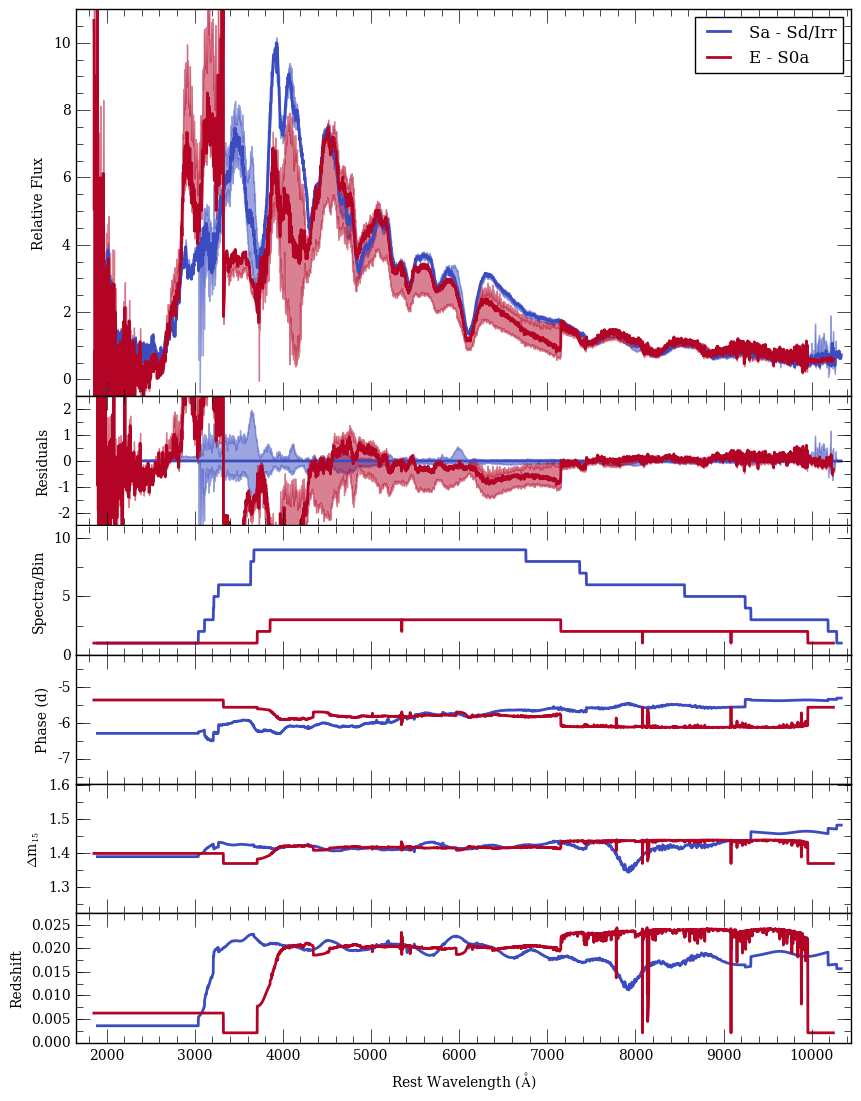

In [29]:
# composite.optimize_scales(comps_host_high_dm15, comps_host_high_dm15[0], True)
query_db.set_min_num_spec(comps_host_high_dm15_m1week, 1)
# query_db.comparison_plot(comps_host_high_dm15, scale_type=True)
query_db.comparison_plot(comps_host_high_dm15_m1week, scale_type=False, min_num_show=1, min_num_scale=2, legend_labels = ['Sa - Sd/Irr','E - S0a'], savename='host_composites_updated/high_dm15_host_m1week')